In [1]:
import os
from src.utils.logging import Logger

def gather_logs(pref):
    best_p = {}
    all_l = {}
    for prefix in pref:
        all_l[prefix] = {}
        logs = all_l[prefix]
        best_p[prefix] = {}
        best_performance = best_p[prefix]
        if not os.path.exists(prefix):
            continue
        for uuid in os.listdir(prefix):
            if os.path.isdir(os.path.join(prefix, uuid)):
                save_dir = os.path.join(prefix, uuid)
                logger = Logger(save_folder=save_dir, read_only=True, auto_load_progress=True)
                client_args = logger.progress.client_args
                if logger.autoload_succeeded:
                    progress = logger.progress

                    if client_args.num_malicious_clients not in list(logs.keys()):
                        logs[client_args.num_malicious_clients] = {}
                    m = client_args.num_malicious_clients
                    if m not in list(best_performance.keys()):
                        best_performance[m] = {}
                    logs[m][uuid] = {
                        "clean": progress.global_test_accuracies,
                        "asr": progress.backdoor_asrs,
                        "name": progress.env_args.model_file,
                        "lr": progress.client_args.benign_lr,
                        "seed": progress.env_args.seed
                    }
                    if len(logs[m][uuid]['clean']) > 0:
                        if 'clean' in best_performance[m].keys():
                            if max(logs[m][uuid]['clean']) > best_performance[m]['clean']:
                                best_performance[m]['clean'] = max(logs[m][uuid]['clean'])
                            if max(logs[m][uuid]['asr']) > best_performance[m]['asr']:
                                best_performance[m]['asr'] = max(logs[m][uuid]['asr'])
                        else:
                            best_performance[m] = {"clean": max(logs[m][uuid]['clean']), "asr": max(logs[m][uuid]['asr'])}
    return all_l, best_p

def gather_logs_finetune(pref):
    best_p = {}
    all_l = {}
    for prefix in pref:
        w_suffix = os.path.join(prefix, "fine_tune")
        if (not os.path.exists(w_suffix)):
            continue
        all_l[prefix] = {}
        logs = all_l[prefix]
        best_p[prefix] = {}
        best_performance = best_p[prefix]
        # print(prefix, (not os.path.exists(prefix)), (not prefix.endswith("fine_tune/")))
        # if (not os.path.exists(prefix)) or (not prefix.endswith("fine_tune/")):

        for uuid in os.listdir(w_suffix):
            if os.path.isdir(os.path.join(w_suffix, uuid)):
                save_dir = os.path.join(w_suffix, uuid)
                logger = Logger(save_folder=save_dir, read_only=True, auto_load_progress=True)
                client_args = logger.progress.client_args
                aggregator_args = logger.progress.aggregator_args
                if logger.autoload_succeeded:
                    progress = logger.progress
                    if client_args.num_malicious_clients not in list(logs.keys()):
                        logs[client_args.num_malicious_clients] = {}
                    m = client_args.num_malicious_clients
                    if m not in list(best_performance.keys()):
                        best_performance[m] = {}
                    logs[m][uuid] = {
                        "clean": progress.global_test_accuracies,
                        "asr": progress.backdoor_asrs,
                        "name": progress.env_args.model_file,
                        "lr": progress.client_args.benign_lr,
                        "clip": aggregator_args.fine_tune_clip,
                        "fine_tune_size": aggregator_args.fine_tune,
                        "seed": progress.env_args.seed
                    }
                    if len(logs[m][uuid]['clean']) > 0:
                        if 'clean' in best_performance[m].keys():
                            if max(logs[m][uuid]['clean']) > best_performance[m]['clean']:
                                best_performance[m]['clean'] = max(logs[m][uuid]['clean'])
                            if max(logs[m][uuid]['asr']) > best_performance[m]['asr']:
                                best_performance[m]['asr'] = max(logs[m][uuid]['asr'])
                        else:
                            best_performance[m] = {"clean": max(logs[m][uuid]['clean']), "asr": max(logs[m][uuid]['asr'])}
    return all_l, best_p

In [2]:
colors = ['#1f77b4',  # muted blue
 '#ff7f0e',  # safety orange
 '#2ca02c',  # cooked asparagus green
 '#d62728',  # brick red
 '#9467bd',  # muted purple
 '#8c564b',  # chestnut brown
 '#e377c2',  # raspberry yogurt pink
 '#7f7f7f',  # middle gray
 '#bcbd22',  # curry yellow-green
 '#17becf']  # blue-teal

# Figure 1

[(tensor(False), 2.3498916625976562, 0.4898946073549984, 4.796708572247729, tensor(True)), (tensor(False), 2.0731643975949754, 0.461287249160428, 4.494280735850054, tensor(True)), (tensor(False), 1.9597422281901042, 0.5077583207247605, 3.8595767872259295, tensor(True)), (tensor(False), 1.903948465983073, 0.4945858016226323, 3.8495615113427233, tensor(True)), (tensor(False), 1.8726995131548714, 0.50905763565901, 3.678737694859535, tensor(True)), (tensor(False), 1.8207560520546109, 0.4876006464571598, 3.73409277711977, tensor(True)), (tensor(False), 1.770915012733609, 0.42032771756314535, 4.213153067802549, tensor(True)), (tensor(False), 1.7733103434244792, 0.45312758565729433, 3.9134680817372414, tensor(True)), (tensor(False), 1.7389993106617647, 0.487420778631266, 3.567737336814093, tensor(True)), (tensor(False), 1.7329996146407782, 0.47037638083299166, 3.684261551508643, tensor(True)), (tensor(False), 1.6825724583046109, 0.47406974200461527, 3.5491876178172754, tensor(True)), (tensor(

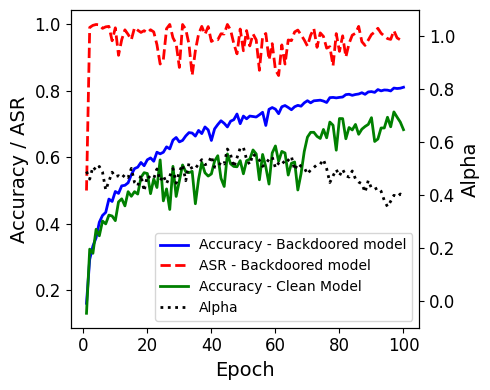

In [3]:

import pickle
import matplotlib.pyplot as plt
# ---- load your data ----
with open('../krum_picked_benign.pkl', 'rb') as f:
    picked_benign_stats = pickle.load(f)  # (picked_benign, radius, alpha, mal_ben_center_dist, picked_benign_before_opt)
print(picked_benign_stats)
key = "../saved_models/paper_figures/figure_1/"
clean_key = "../saved_models/paper_figures/figure_1_clean_only/"
logs = gather_logs([key, ])[0]
clean_logs = gather_logs([clean_key, ])[0]
# each entry is (bool, float, float)
picked_benign = [int(t[0]) for t in picked_benign_stats]  # convert True/False to 1/0
# radius         = [t[1] for t in picked_benign_stats]
distance = [t[3] for t in picked_benign_stats]
alpha          = [t[2] for t in picked_benign_stats]
epochs         = list(range(1, len(picked_benign_stats) + 1))

# ---- make the plot ----
fig, ax1 = plt.subplots(figsize=(5, 4))
# bar for picked_benign
# ax1.bar(epochs, picked_benign, label='Picked Benign', alpha=0.5)
ax1.plot(epochs, logs[key][1][list(logs[key][1].keys())[0]]['clean'], color="blue", label='Accuracy - Backdoored model', linewidth=2)
ax1.plot(epochs, logs[key][1][list(logs[key][1].keys())[0]]['asr'], color="red", label='ASR - Backdoored model', linestyle='--', linewidth=2)
ax1.plot(epochs[:len(clean_logs[clean_key][0][list(clean_logs[clean_key][0].keys())[0]]['clean'])], clean_logs[clean_key][0][list(clean_logs[clean_key][0].keys())[0]]['clean'], color="green", label='Accuracy - Clean Model', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=14)
ax1.set_ylabel('Accuracy / ASR', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)

# right axis: line for radius
ax2 = ax1.twinx()
# ax2.plot(epochs, distance, color='C2', marker='o', label='distance')
ax2.plot(epochs, alpha, color="black", label='Alpha', linestyle=':', linewidth=2)
ax2.set_ylabel('Alpha', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)
ax2.set_ylim(-0.1, 1.1)

# combine legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='lower right')

plt.tight_layout()
plt.savefig("figure_1.pdf", dpi=800)
plt.show()

# Figure 2

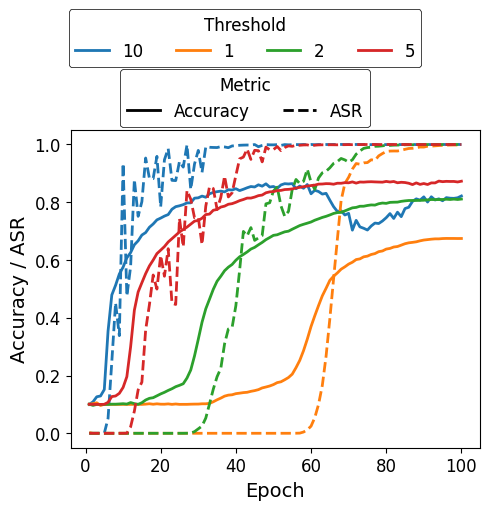

In [4]:
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

key = "../saved_models/paper_figures/figure_2/"

logs = gather_logs([key])[0]
epochs = list(range(1, 101))
uuids = list(logs[key][8].keys())
thresholds = [
    int(os.path.splitext(logs[key][8][u]['name'])[0].split('_')[1])
    for u in uuids
]

fig, ax = plt.subplots(figsize=(5, 4))

# plot all curves (no labels)
for i, uuid in enumerate(uuids):
    clean = logs[key][8][uuid]['clean']
    asr   = logs[key][8][uuid]['asr']
    ax.plot(epochs[:len(clean)], clean,   color=colors[i], linewidth=2)
    ax.plot(epochs[:len(asr)],   asr,     color=colors[i], linewidth=2, linestyle='--')

ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Accuracy / ASR', fontsize=14)
ax.tick_params(labelsize=12)

# Threshold legend (colors → m)
th_handles = [Line2D([0],[0], color=colors[i], lw=2) for i in range(len(thresholds))]
th_labels  = [f"{th}" for th in thresholds]
legend1 = fig.legend(
    th_handles, th_labels,
    title="Threshold",
    loc='upper center',
    bbox_to_anchor=(0.5, 1.285),
    ncol=len(thresholds),
    frameon=True,              # turn the box on
    facecolor='white',         # give it a white background
    edgecolor='black',         # black border
    fontsize=12,
    title_fontsize=12
)
legend1.get_frame().set_linewidth(0.5)

# Metric legend (solid vs dashed)
met_handles = [
    Line2D([0],[0], color='black', lw=2, linestyle='-'),
    Line2D([0],[0], color='black', lw=2, linestyle='--'),
]
met_labels = ["Accuracy","ASR"]
legend2 = fig.legend(
    met_handles, met_labels,
    title="Metric",
    loc='upper center',
    bbox_to_anchor=(0.5, 1.135),
    ncol=2,
    frameon=True,
    facecolor='white',
    edgecolor='black',
    fontsize=12,
    title_fontsize=12
)
legend2.get_frame().set_linewidth(0.5)

# make sure both stay
ax.add_artist(legend1)
ax.add_artist(legend2)

# push the axes down so legends don’t overlap
fig.subplots_adjust(top=0.80)

plt.tight_layout()
plt.savefig("figure_2.pdf", dpi=800, bbox_inches='tight')
plt.show()

# Figure 4

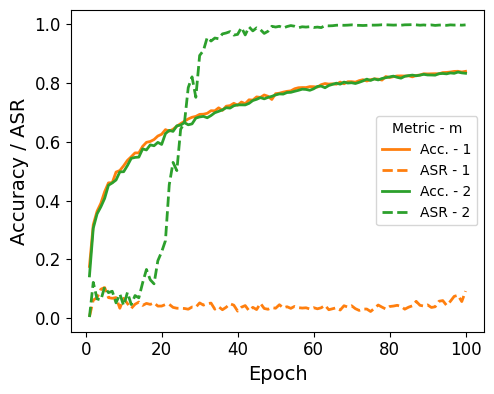

In [5]:
key = "../saved_models/lr_0_01_ft_2000_k_0_2/badnet_mom_opt_fine_tune/"
logs = gather_logs([key, ])[0]
fig = plt.figure(figsize=(5,4))
for m in [1, 2]:
    # assert len(list(logs[key][m].keys())) == 1
    runs = [
    uuid
    for uuid in logs[key][m]
    if int(logs[key][m][uuid]["seed"]) == 0
    ]
    assert len(runs) == 1
    uuid = runs[0]
    plt.plot(epochs[:len(logs[key][m][uuid]['clean'])], logs[key][m][uuid]['clean'], label=f"Acc. - {m}", color=colors[m], linewidth=2)
    plt.plot(epochs[:len(logs[key][m][uuid]['asr'])], logs[key][m][uuid]['asr'], label=f"ASR - {m}", linestyle='--', color=colors[m], linewidth=2)

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy / ASR', fontsize=14)
leg = plt.legend()
leg.set_title("Metric - m")
# plt.title('ASR/Accuracy of MoM attack for m=[1,2] malicious clients')
plt.tight_layout()
plt.tick_params(labelsize=12)
plt.savefig("figure_4.pdf", dpi=800)
plt.show()

# Figure 6

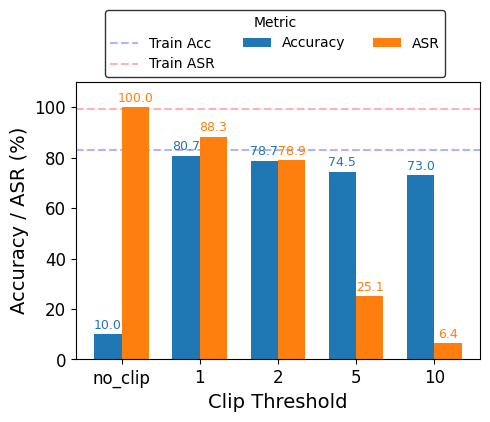

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

key = "../saved_models/lr_0_01_ft_2000_k_0_2/badnet_fed_avg_opt_fine_tune/"
m   = 1

# — Gather baseline (pre–fine-tune) final values —
baseline_logs = gather_logs([key])[0]
baseline_data = baseline_logs[key][m]
runs = [u for u in baseline_data if int(baseline_data[u]["seed"]) == 0]
assert len(runs) == 1
uuid0 = runs[0]
baseline_acc = baseline_data[uuid0]['clean']
baseline_asr = baseline_data[uuid0]['asr']
train_acc_val = baseline_acc[-1] * 100
train_asr_val = baseline_asr[-1] * 100

# Gather fine-tune logs
ft_logs = gather_logs_finetune([key])[0]

clip_values = [-1, 1, 2, 5, 10]

# 1) collect last-epoch acc/asr for each clip (seed==0)
accs, asrs, labels = [], [], []
for clip in clip_values:
    for uuid, info in ft_logs[key][m].items():
        if info["seed"] == 0 and int(info["clip"]) == clip:
            accs.append(info['clean'][-1] * 100)
            asrs.append(info['asr'][-1]   * 100)
            labels.append("no_clip" if clip == -1 else str(clip))
            break

# 2) bar positions
x     = np.arange(len(clip_values))
width = 0.35

# 3) bar chart + baseline lines
fig, ax = plt.subplots(figsize=(5, 4))
# baseline lines
ax.axhline(train_acc_val, color='blue', linestyle='--', linewidth=1.5, label='Train Acc', zorder=0, alpha=0.3)
ax.axhline(train_asr_val, color='red',  linestyle='--', linewidth=1.5, label='Train ASR', zorder=0, alpha=0.3)
# bars
bars_acc = ax.bar(x - width/2, accs, width, label="Accuracy", color="C0")
bars_asr = ax.bar(x + width/2, asrs, width, label="ASR",      color="C1")
ax.margins(y=0.10)

# 4) annotate bars
for i, bar in enumerate(bars_acc + bars_asr):
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + 1,
        f"{h:.1f}",
        ha="center", va="bottom",
        fontsize=9,
        color="C0" if i < len(bars_acc) else "C1"
    )

# 5) axes & ticks
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel("Clip Threshold",        fontsize=14)
ax.set_ylabel("Accuracy / ASR (%)",    fontsize=14)
ax.tick_params(labelsize=12)

# 6) legend above (now includes the two baseline lines)
handles, lbls = ax.get_legend_handles_labels()
legend = fig.legend(
    handles, lbls,
    title="Metric",
    loc="upper center",
    bbox_to_anchor=(0.56, 1.06),
    ncol=3,  # now three entries per row
    frameon=True,
    facecolor="white",
    edgecolor="black",
    fontsize=10,
    title_fontsize=10
)

# 7) layout & save
fig.subplots_adjust(top=0.9)
plt.tight_layout(rect=[0,0,1,0.9])
plt.savefig("figure_6.pdf", dpi=800,
            bbox_inches="tight",
            pad_inches=0.1,
            bbox_extra_artists=[legend])
plt.show()

# Figure 7

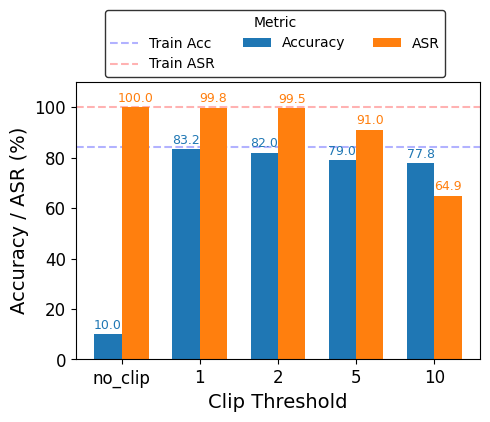

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

key = "../saved_models/lr_0_01_ft_2000_k_0_2/badnet_fed_avg_opt_fine_tune/"
m   = 8

# — Gather baseline (pre–fine-tune) final values —
baseline_logs = gather_logs([key])[0]
baseline_data = baseline_logs[key][m]
runs = [u for u in baseline_data if int(baseline_data[u]["seed"]) == 0]
assert len(runs) == 1
uuid0 = runs[0]
baseline_acc = baseline_data[uuid0]['clean']
baseline_asr = baseline_data[uuid0]['asr']
train_acc_val = baseline_acc[-1] * 100
train_asr_val = baseline_asr[-1] * 100

# Gather fine-tune logs
ft_logs = gather_logs_finetune([key])[0]

clip_values = [-1, 1, 2, 5, 10]

# 1) collect last-epoch acc/asr for each clip (seed==0)
accs, asrs, labels = [], [], []
for clip in clip_values:
    for uuid, info in ft_logs[key][m].items():
        if info["seed"] == 0 and int(info["clip"]) == clip:
            accs.append(info['clean'][-1] * 100)
            asrs.append(info['asr'][-1]   * 100)
            labels.append("no_clip" if clip == -1 else str(clip))
            break

# 2) bar positions
x     = np.arange(len(clip_values))
width = 0.35

# 3) bar chart + baseline lines
fig, ax = plt.subplots(figsize=(5, 4))
# baseline lines
ax.axhline(train_acc_val, color='blue', linestyle='--', linewidth=1.5, label='Train Acc', zorder=0, alpha=0.3)
ax.axhline(train_asr_val, color='red',  linestyle='--', linewidth=1.5, label='Train ASR', zorder=0, alpha=0.3)
# bars
bars_acc = ax.bar(x - width/2, accs, width, label="Accuracy", color="C0")
bars_asr = ax.bar(x + width/2, asrs, width, label="ASR",      color="C1")
ax.margins(y=0.10)

# 4) annotate bars
for i, bar in enumerate(bars_acc + bars_asr):
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + 1,
        f"{h:.1f}",
        ha="center", va="bottom",
        fontsize=9,
        color="C0" if i < len(bars_acc) else "C1"
    )

# 5) axes & ticks
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel("Clip Threshold",        fontsize=14)
ax.set_ylabel("Accuracy / ASR (%)",    fontsize=14)
ax.tick_params(labelsize=12)

# 6) legend above (now includes the two baseline lines)
handles, lbls = ax.get_legend_handles_labels()
legend = fig.legend(
    handles, lbls,
    title="Metric",
    loc="upper center",
    bbox_to_anchor=(0.56, 1.06),
    ncol=3,  # now three entries per row
    frameon=True,
    facecolor="white",
    edgecolor="black",
    fontsize=10,
    title_fontsize=10
)

# 7) layout & save
fig.subplots_adjust(top=0.9)
plt.tight_layout(rect=[0,0,1,0.9])
plt.savefig("figure_7.pdf", dpi=800,
            bbox_inches="tight",
            pad_inches=0.1,
            bbox_extra_artists=[legend])
plt.show()

# Forget-Me-Not

In [8]:
import matplotlib.pyplot as plt

key = "../saved_models/lr_0_01_ft_2000_k_0_2/fmn_badnet/"

# Load logs
train_logs = gather_logs([key])[0]
ft_logs    = gather_logs_finetune([key])[0]
clip = 2

for i, m in enumerate([1]):
    assert len(list(train_logs[key][m].keys())) == 1
    # uuid = next(iter(train_logs[key][m]))
    runs = [
    uuid
    for uuid in train_logs[key][m]
    if int(train_logs[key][m][uuid]["seed"]) == 0
    ]
    assert len(runs) == 1
    uuid = runs[0]

    clean = train_logs[key][m][uuid]['clean']
    asr   = train_logs[key][m][uuid]['asr']
    print(f"Final training accuracy: {clean[-1]:.2f} and ASR: {asr[-1]:.2f}")


# —— Bottom panel: Fine-tuning ——
for i, m in enumerate([1]):
    for uuid in ft_logs[key][m]:
        if int(ft_logs[key][m][uuid]["clip"]) == clip and ft_logs[key][m][uuid]["seed"] == 0:
            clean = ft_logs[key][m][uuid]['clean']
            asr   = ft_logs[key][m][uuid]['asr']
            print(f"Final fine-tuning accuracy: {clean[-1]:.2f} and ASR: {asr[-1]:.2f}")


Final training accuracy: 0.84 and ASR: 0.95
Final fine-tuning accuracy: 0.79 and ASR: 0.36


# Figure 12a

In [9]:
import matplotlib.pyplot as plt
increment = 5
defenses = ["krum", "norm", "mom", "rob_mom"]
m_list = [1,2,4,8]
attack_threshold_asr = 0.5
# how many total rows of subplots?
fine_tune_size = 500
acceptable_drop = 0.2
show_no_defense = False
attacks = ["badnet", "blended"]

In [10]:
acceptable_drops = {500: 0.2, 2000: 0.05}
params = {
    "none": {
        500: {
            0.2: {
                "clip": 5
            },
            0.1: {
                "clip": 10
            }
        },
        2000: {
            0.05: {
                "clip": 2
            }
        }
    },
    "krum": {
        500: {
            0.2: {
                "clip": 5
            },
            0.1: {
                "clip": 2
            }
        },
        2000: {
            0.05: {
                "clip": 2
            }
        }
    },
    "mom": {
        500 :{
            0.2: {
                "clip": 10
            },
            0.1: {
                "clip": 2
            }
        },
        2000: {
            0.05: {
                "clip": 2
            }
        }
    },
    "norm": {
        500 :{
            0.2: {
                "clip": 10
            },
            0.1: {
                "clip": 2
            }
        },
        2000: {
            0.05: {
                "clip": 2
            }
        }
    },
    "rob_mom": {
        500 :{
            0.2: {
                "clip": 10
            },
            0.1: {
                "clip": 2
            }
        },
        2000: {
            0.05: {
                "clip": 1
            }
        }
    }
}


In [11]:
base_path = f"../saved_models/lr_0_01_ft_{fine_tune_size}_k_0_2/"
prefixes = []
for end_prefix in os.listdir(base_path):
    if os.path.isdir(os.path.join(base_path, end_prefix)):
        prefixes.append(os.path.join(base_path, end_prefix) + "/")
print(prefixes)

['../saved_models/lr_0_01_ft_500_k_0_2/replacement_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/replacement_vs_all/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_norm_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_rob_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_krum_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/local_finetune_set_training/', '../saved_models/lr_0_01_ft_500_k_0_2/fmn_blended/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_replacement_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_rob_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_krum_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/fmn_badnet/', '../saved_models/lr_0_01_ft_500_k_0_2/fed_avg_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_norm_opt_fine_tune/', '../saved_models

In [12]:
prefix = f"../saved_models/lr_0_01_ft_{fine_tune_size}_k_0_2/local_finetune_set_training/"
baseline_log = {}
baseline_lrs = {}
best_baseline_lr = None
best_baseline_perf = 0
for uuid in os.listdir(prefix):
    if os.path.isdir(os.path.join(prefix, uuid)):
        save_dir = os.path.join(prefix, uuid)
        logger = Logger(save_folder=save_dir, read_only=True, auto_load_progress=True)
        if logger.autoload_succeeded:
            progress = logger.progress
            if progress.client_args.benign_lr in list(baseline_lrs.keys()):
                # multiple models with this lr
                print(f"More than one model with lr: {progress.client_args.benign_lr}.")
                baseline_lrs[progress.client_args.benign_lr].append(uuid)
            else:
                baseline_lrs[progress.client_args.benign_lr] = [uuid,]

            baseline_log[uuid] = {
                "clean": progress.global_test_accuracies,
                "asr": progress.backdoor_asrs,
                "name": progress.env_args.model_file,
                "lr": progress.client_args.benign_lr
            }
            if max(progress.global_test_accuracies) > best_baseline_perf:
                best_baseline_perf = max(progress.global_test_accuracies)
                best_baseline_lr = progress.client_args.benign_lr

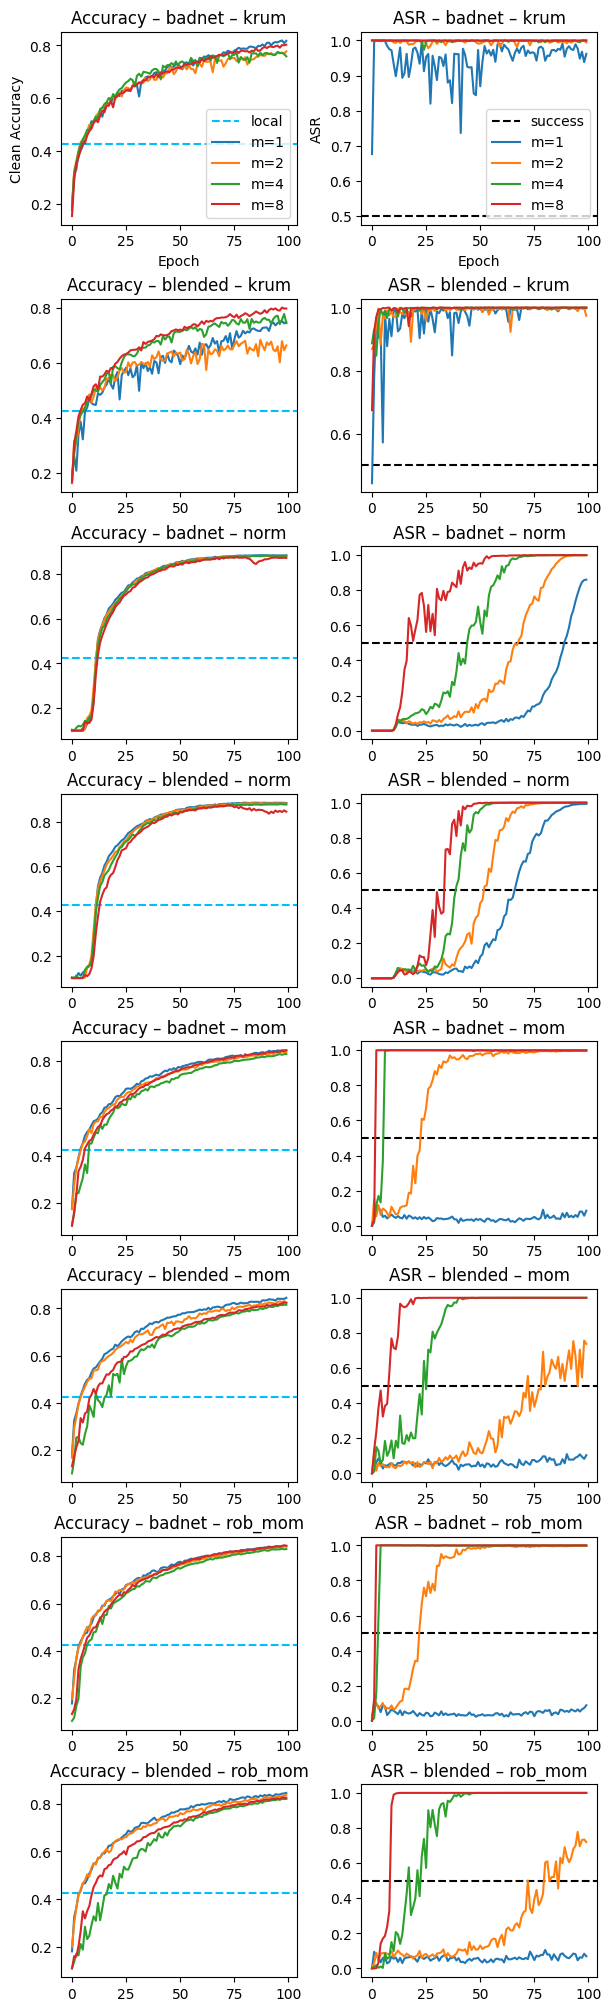

In [13]:

n_rows = len(defenses) * len(attacks)
n_cols = 2

# make a Figure with that grid
fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(6, increment*len(defenses)),
                         constrained_layout=True)   # ← let Matplotlib handle spacing

                         # tight_layout=True)
# TODO: remove line below if don't want legend to the right outside
# fig.subplots_adjust(left=0.2)    # leave 20% of figure width for legends

# if there's only one row or one col, axes might not be 2d; force it:
axes = axes.reshape(n_rows, n_cols)

for i, defense in enumerate(defenses):
    current_prefixes = [p for p in prefixes if defense in p]
    # pick out your two baselines once
    if fine_tune_size == 500:
        badnet_baseline = next(p for p in prefixes if p.endswith("/fed_avg_opt_fine_tune/"))
    else:
        badnet_baseline = next(p for p in prefixes if p.endswith("/badnet_fed_avg_opt_fine_tune/"))
    blended_baseline = next(p for p in prefixes if p.endswith("/blended/"))
    current_prefixes += [badnet_baseline, blended_baseline]
    train_logs, best_performances = gather_logs(current_prefixes)

    for j, attack in enumerate(attacks):
        row = i*len(attacks) + j
        ax_acc, ax_asr = axes[row, 0], axes[row, 1]

        # Accuracy subplot
        ax_acc.set_title(f"Accuracy – {attack} – {defense}")
        ax_acc.axhline(best_baseline_perf, color='deepskyblue', linestyle='--', label="local")
        if show_no_defense:
            key = badnet_baseline if attack=="badnets" else blended_baseline
            acc = train_logs[key][m_list[-1]][ list(train_logs[key][m_list[-1]].keys())[0] ]['clean']
            ax_acc.plot(acc, label=f"no_defense, m={m_list[-1]}")
        for prefix in current_prefixes:
            if attack not in prefix or prefix in (badnet_baseline, blended_baseline):
                continue
            # special case for mom and rob_mom
            if defense == "mom" and "rob_mom" in prefix:
                continue
            logs = train_logs[prefix]
            for k, m in enumerate(m_list):
                # uuid = next(iter(logs[m]))
                runs = [
                uuid
                for uuid in logs[m]
                if int(logs[m][uuid]["seed"]) == 0
                ]
                assert len(runs) == 1
                uuid = runs[0]
                acc = logs[m][uuid]['clean']
                ax_acc.plot(acc, label=f"m={int(m)}", color=colors[k])

        # ASR subplot
        ax_asr.set_title(f"ASR – {attack} – {defense}")
        ax_asr.axhline(attack_threshold_asr, color='black', linestyle='--', label="success")
        if show_no_defense:
            asr = train_logs[key][m_list[-1]][list(train_logs[key][m_list[-1]].keys())[0]]['asr']
            ax_asr.plot(asr, label=f"no_defense, m={m_list[-1]}")
        for prefix in current_prefixes:
            if attack not in prefix or prefix in (badnet_baseline, blended_baseline):
                continue
            # special case for mom and rob_mom
            if defense == "mom" and "rob_mom" in prefix:
                continue
            logs = train_logs[prefix]
            for k, m in enumerate(m_list):
                # uuid = next(iter(logs[m]))
                runs = [
                uuid
                for uuid in logs[m]
                if int(logs[m][uuid]["seed"]) == 0
                ]
                assert len(runs) == 1
                uuid = runs[0]

                asr = logs[m][uuid]['asr']
                ax_asr.plot(asr, label=f"m={int(m)}", color=colors[k])
        # only add legend on the first row
        if i == 0 and j==0:
            ax_acc.legend(loc="lower right")
            ax_asr.legend(loc="lower right")


axes[0,0].set_xlabel("Epoch")          # or whatever your x‐axis represents
axes[0,0].set_ylabel("Clean Accuracy")
axes[0, 1].set_xlabel("Epoch")
axes[0, 1].set_ylabel("ASR")

plt.savefig("figure_12_a.pdf", dpi=800,)  #   bbox_inches="tight",
plt.show()

# Figure 12b

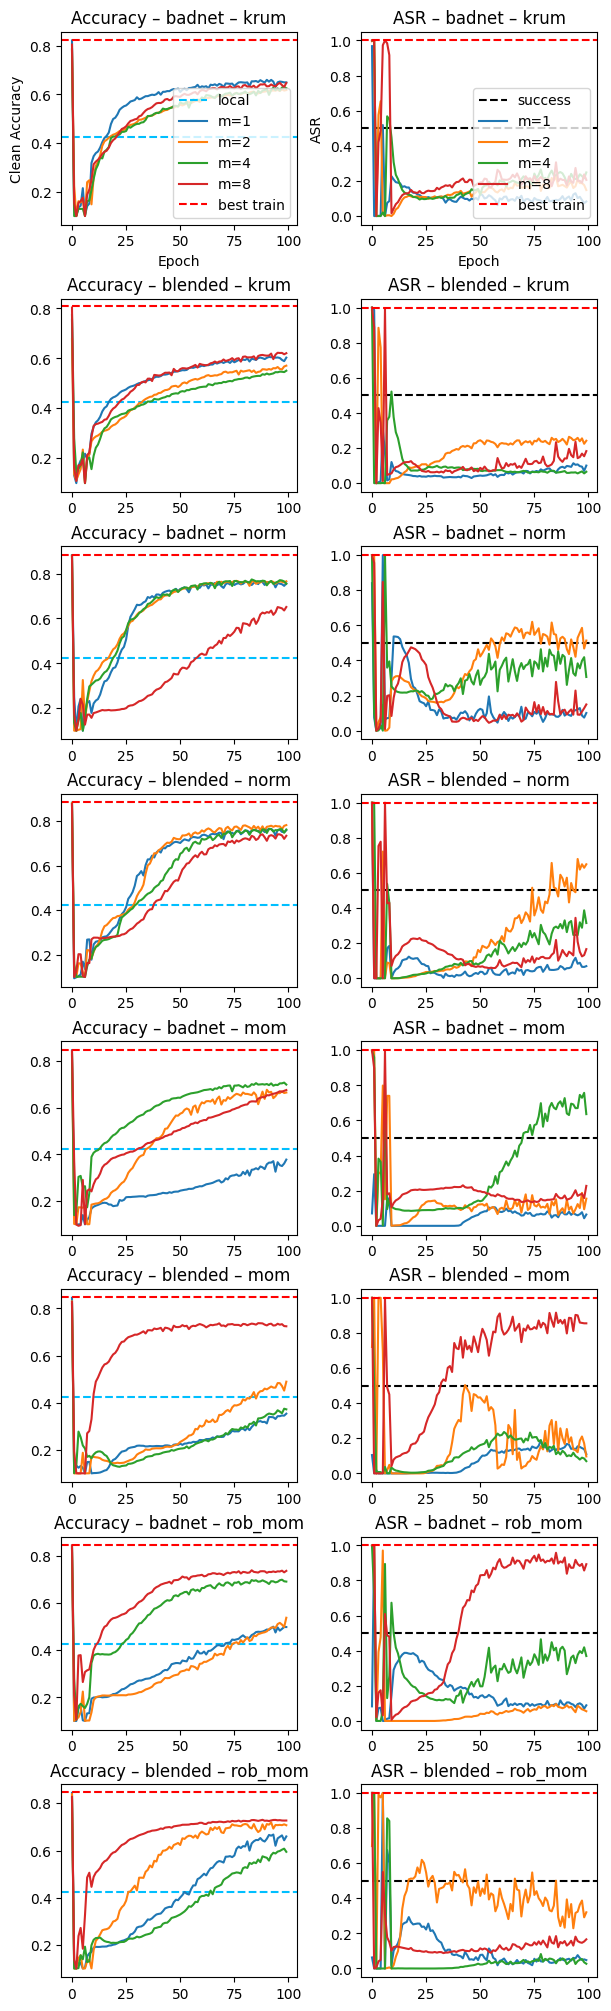

In [14]:
import matplotlib.pyplot as plt

# total rows = defenses × attacks, two columns (clean / ASR)
n_rows = len(defenses) * len(attacks)
n_cols = 2

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(6, increment * len(defenses)),
    constrained_layout=True
)
# after creating fig,axes:
# fig.subplots_adjust(right=0.8)    # leave 20% of figure width for legends
# ensure axes is always 2D
axes = axes.reshape(n_rows, n_cols)


for i, defense in enumerate(defenses):
    # pick out your two baselines
    if fine_tune_size == 500:
        badnet_baseline = next(p for p in prefixes if p.endswith("/fed_avg_opt_fine_tune/"))
    else:
        badnet_baseline = next(p for p in prefixes if p.endswith("/badnet_fed_avg_opt_fine_tune/"))
    blended_baseline = next(p for p in prefixes if p.endswith("/blended/"))

    current_prefixes = [p for p in prefixes if defense in p]
    current_prefixes += [badnet_baseline, blended_baseline]

    # gather logs
    finetune_logs, best_performances = gather_logs_finetune(current_prefixes)
    clip_val = params[defense][fine_tune_size][acceptable_drop]["clip"]

    for j, attack in enumerate(attacks):
        row = i * len(attacks) + j
        ax_clean, ax_asr = axes[row, 0], axes[row, 1]

        # — Clean-accuracy plot —
        ax_clean.set_title(f"Accuracy – {attack} – {defense}")
        ax_clean.axhline(
            y=best_baseline_perf,
            color="deepskyblue",
            linestyle="--",
            label="local"
        )

        # optional “no defense” curve
        # if show_no_defense:
        #     key = badnet_baseline if attack == "badnets" else blended_baseline
        #     uuid = next(iter(finetune_logs[key][m_list[-1]]))
        #     clean_no_def = finetune_logs[key][m_list[-1]][uuid]["clean"]
        #     ax_clean.plot(clean_no_def, label=f"no_defense, m={m_list[-1]}")

        # — ASR plot —
        ax_asr.set_title(f"ASR – {attack} – {defense}")
        ax_asr.axhline(
            y=attack_threshold_asr,
            color="black",
            linestyle="--",
            label="success"
        )
        # if show_no_defense:
        #     asr_no_def = finetune_logs[key][m_list[-1]][uuid]["asr"]
        #     ax_asr.plot(asr_no_def, label=f"no_defense, m={m_list[-1]}")

        # track bests so we can draw hlines later
        best_clean, best_asr = 0.0, 0.0

        # now plot each m
        for prefix in current_prefixes:
            if attack not in prefix or prefix in (badnet_baseline, blended_baseline):
                continue
            # special case for mom and rob_mom
            if defense == "mom" and "rob_mom" in prefix:
                continue
            logs = finetune_logs[prefix]
            for k, m in enumerate(m_list):
                perf = best_performances[prefix][m]
                best_clean = max(best_clean, perf["clean"])
                best_asr   = max(best_asr,   perf["asr"])

                # pick the run with the desired clip
                runs = [
                    logs[m][uuid]
                    for uuid in logs[m]
                    if int(logs[m][uuid]["clip"]) == clip_val and logs[m][uuid]["seed"] == 0
                ]
                run = runs[0]  # should be exactly one

                ax_clean.plot(run["clean"], label=f"m={int(m)}", color=colors[k])
                ax_asr.plot(run["asr"],   label=f"m={int(m)}", color=colors[k])

        # draw “best training” and “max drop” lines
        ax_clean.axhline(best_clean, color="red",   linestyle="--", label="best train")

        ax_asr.axhline(best_asr, color="red", linestyle="--", label="best train")
        if i == 0 and j==0:
            ax_clean.legend(loc="lower right")
            ax_asr.legend(loc="lower right")

axes[0,0].set_xlabel("Epoch")          # or whatever your x‐axis represents
axes[0,0].set_ylabel("Clean Accuracy")
axes[0, 1].set_xlabel("Epoch")
axes[0, 1].set_ylabel("ASR")
#

# finally, show them all at once
plt.savefig("figure_12_b.pdf", dpi=800,)   #  bbox_inches="tight",

    #pad_inches=0.1)

plt.show()

# Figure 11a

In [15]:
fine_tune_size = 2000
acceptable_drop = 0.05
# getting the correct values and prefixes for the new fine-tune size
base_path = f"../saved_models/lr_0_01_ft_{fine_tune_size}_k_0_2/"
prefixes = []
for end_prefix in os.listdir(base_path):
    if os.path.isdir(os.path.join(base_path, end_prefix)):
        prefixes.append(os.path.join(base_path, end_prefix) + "/")
print(prefixes)

prefix = f"../saved_models/lr_0_01_ft_{fine_tune_size}_k_0_2/local_finetune_set_training/"
baseline_log = {}
baseline_lrs = {}
best_baseline_lr = None
best_baseline_perf = 0
for uuid in os.listdir(prefix):
    if os.path.isdir(os.path.join(prefix, uuid)):
        save_dir = os.path.join(prefix, uuid)
        logger = Logger(save_folder=save_dir, read_only=True, auto_load_progress=True)
        if logger.autoload_succeeded:
            progress = logger.progress
            if progress.client_args.benign_lr in list(baseline_lrs.keys()):
                # multiple models with this lr
                print(f"More than one model with lr: {progress.client_args.benign_lr}.")
                baseline_lrs[progress.client_args.benign_lr].append(uuid)
            else:
                baseline_lrs[progress.client_args.benign_lr] = [uuid,]

            baseline_log[uuid] = {
                "clean": progress.global_test_accuracies,
                "asr": progress.backdoor_asrs,
                "name": progress.env_args.model_file,
                "lr": progress.client_args.benign_lr
            }
            if max(progress.global_test_accuracies) > best_baseline_perf:
                best_baseline_perf = max(progress.global_test_accuracies)
                best_baseline_lr = progress.client_args.benign_lr

['../saved_models/lr_0_01_ft_2000_k_0_2/badnet_rob_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/badnet_fed_avg_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended_norm_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended_replacement_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/local_finetune_set_training/', '../saved_models/lr_0_01_ft_2000_k_0_2/badnet_replacement_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended_krum_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/replacement_vs_all/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/dirichlet_krum_test/', '../saved_models/lr_0_01_ft_2000_k_0_2/badnet_krum_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/fmn_blended/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended_rob_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/badnet_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended

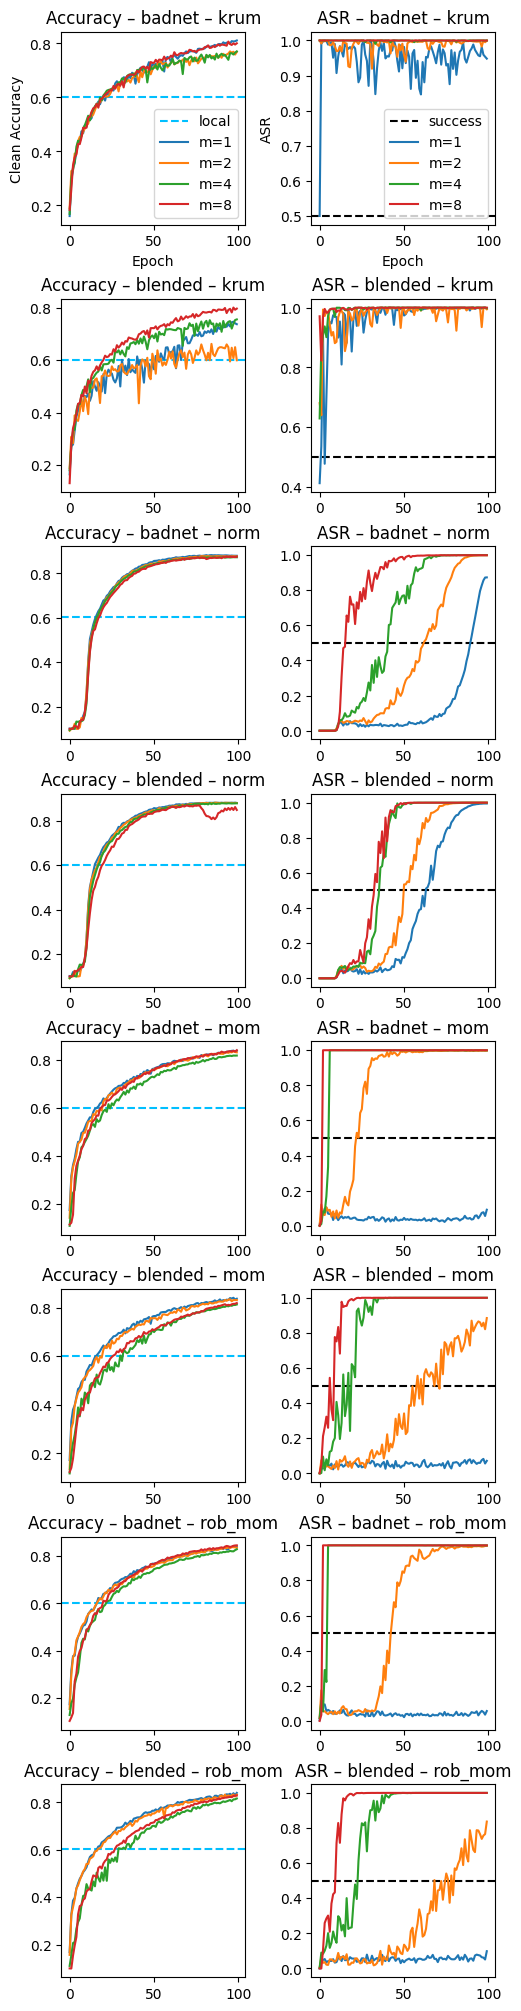

In [16]:

n_rows = len(defenses) * len(attacks)
n_cols = 2
# make a Figure with that grid
fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(5, increment*len(defenses)),
                         constrained_layout=True)   # ← let Matplotlib handle spacing

                         # tight_layout=True)
# TODO: remove line below if don't want legend to the right outside
# fig.subplots_adjust(left=0.2)    # leave 20% of figure width for legends

# if there's only one row or one col, axes might not be 2d; force it:
axes = axes.reshape(n_rows, n_cols)

for i, defense in enumerate(defenses):
    current_prefixes = [p for p in prefixes if defense in p]
    # pick out your two baselines once
    if fine_tune_size == 500:
        badnet_baseline = next(p for p in prefixes if p.endswith("/fed_avg_opt_fine_tune/"))
    else:
        badnet_baseline = next(p for p in prefixes if p.endswith("/badnet_fed_avg_opt_fine_tune/"))
    blended_baseline = next(p for p in prefixes if p.endswith("/blended/"))
    current_prefixes += [badnet_baseline, blended_baseline]
    train_logs, best_performances = gather_logs(current_prefixes)

    for j, attack in enumerate(attacks):
        row = i*len(attacks) + j
        ax_acc, ax_asr = axes[row, 0], axes[row, 1]

        # Accuracy subplot
        ax_acc.set_title(f"Accuracy – {attack} – {defense}")
        ax_acc.axhline(best_baseline_perf, color='deepskyblue', linestyle='--', label="local")
        if show_no_defense:
            key = badnet_baseline if attack=="badnets" else blended_baseline
            acc = train_logs[key][m_list[-1]][ list(train_logs[key][m_list[-1]].keys())[0] ]['clean']
            ax_acc.plot(acc, label=f"no_defense, m={m_list[-1]}")
        for prefix in current_prefixes:
            if attack not in prefix or prefix in (badnet_baseline, blended_baseline):
                continue
            # special case for mom and rob_mom
            if defense == "mom" and "rob_mom" in prefix:
                continue
            logs = train_logs[prefix]
            for k, m in enumerate(m_list):
                # uuid = next(iter(logs[m]))
                runs = [
                uuid
                for uuid in logs[m]
                if int(logs[m][uuid]["seed"]) == 0
                ]
                assert len(runs) == 1
                uuid = runs[0]
                acc = logs[m][uuid]['clean']
                ax_acc.plot(acc, label=f"m={int(m)}", color=colors[k])

        # ASR subplot
        ax_asr.set_title(f"ASR – {attack} – {defense}")
        ax_asr.axhline(attack_threshold_asr, color='black', linestyle='--', label="success")
        if show_no_defense:
            asr = train_logs[key][m_list[-1]][list(train_logs[key][m_list[-1]].keys())[0]]['asr']
            ax_asr.plot(asr, label=f"no_defense, m={m_list[-1]}")
        for prefix in current_prefixes:
            if attack not in prefix or prefix in (badnet_baseline, blended_baseline):
                continue
            # special case for mom and rob_mom
            if defense == "mom" and "rob_mom" in prefix:
                continue
            logs = train_logs[prefix]
            for k, m in enumerate(m_list):
                # uuid = next(iter(logs[m]))
                runs = [
                uuid
                for uuid in logs[m]
                if int(logs[m][uuid]["seed"]) == 0
                ]
                assert len(runs) == 1
                uuid = runs[0]
                asr = logs[m][uuid]['asr']
                ax_asr.plot(asr, label=f"m={int(m)}", color=colors[k])

        if i == 0 and j==0:
            ax_acc.legend(loc="lower right")
            ax_asr.legend(loc="lower right")
        # only add legend on the first row
        # if i == 0 and j == 0:
        # ax_acc.legend(loc="lower right")
        # ax_asr.legend(loc="lower right")
        # if j == 0:
        #     ax_asr.legend(
        #         loc='upper left',
        #         bbox_to_anchor=(1.02, 1),
        #         borderaxespad=0.0
        #     )

# h_clean, l_clean = axes[0,0].get_legend_handles_labels()
# h_asr,   l_asr   = axes[0,1].get_legend_handles_labels()
#
# # combine and de-dup
# all_h = h_clean + h_asr
# all_l = l_clean + l_asr
# seen = {}
# handles, labels = [], []
# for h, lbl in zip(all_h, all_l):
#     if lbl not in seen:
#         seen[lbl] = True
#         handles.append(h)
#         labels.append(lbl)
#
axes[0,0].set_xlabel("Epoch")          # or whatever your x‐axis represents
axes[0,0].set_ylabel("Clean Accuracy")
axes[0, 1].set_xlabel("Epoch")
axes[0, 1].set_ylabel("ASR")
#
# # draw a single legend on the figure, just outside the ASR column
# fig.legend(
#     handles, labels,
#     loc="upper left",
#     # bbox_to_anchor=(0.99, 0.98),
#     bbox_to_anchor=(-0.11, 0.97),
#     borderaxespad=0.0
# )
plt.savefig("figure_11_a.pdf", dpi=800,    )# bbox_inches="tight",
    #pad_inches=0.1)
plt.show()

# Figure 11b

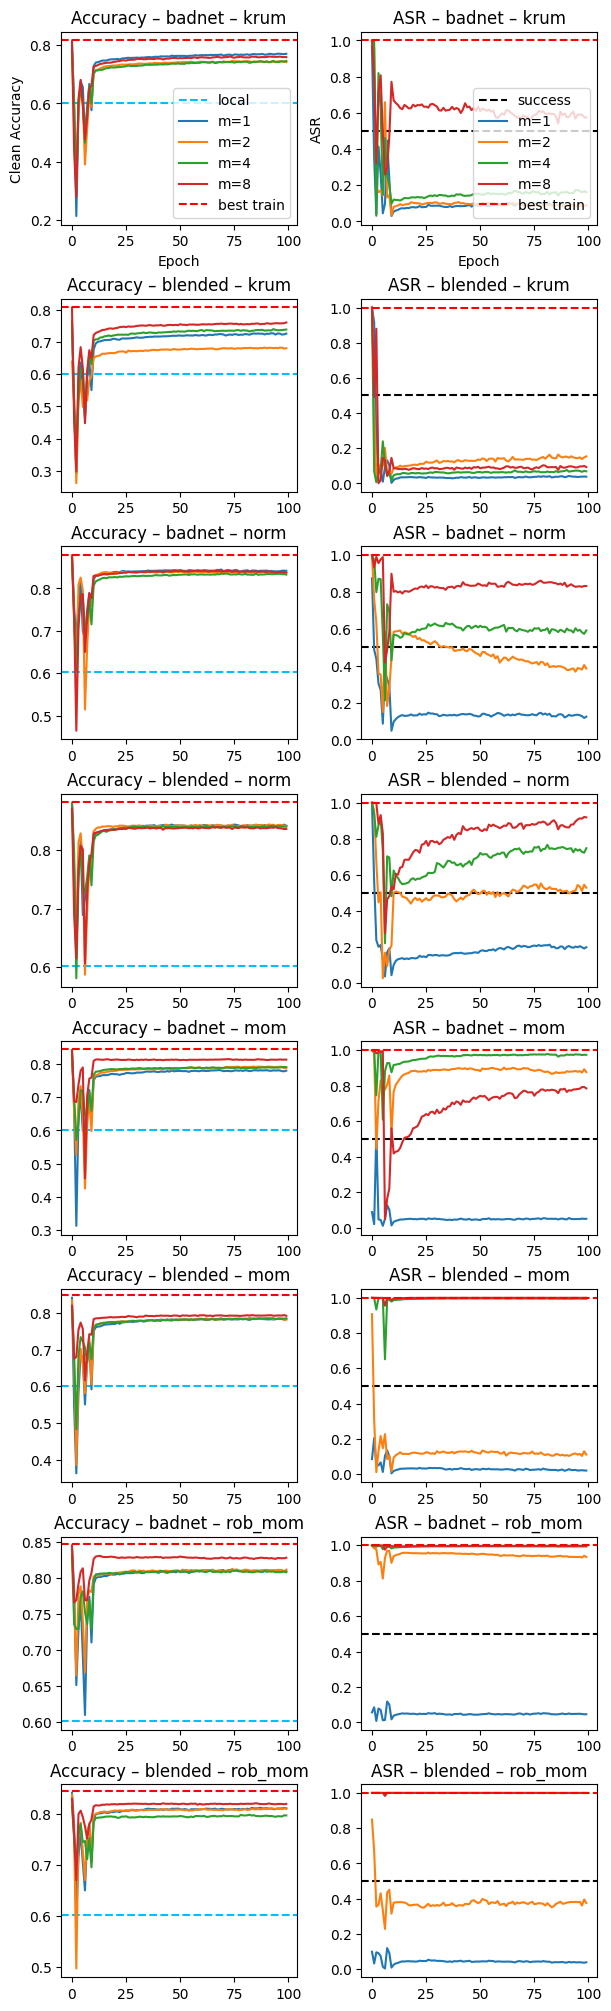

In [17]:
import matplotlib.pyplot as plt

# total rows = defenses × attacks, two columns (clean / ASR)
n_rows = len(defenses) * len(attacks)
n_cols = 2

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(6, increment * len(defenses)),
    constrained_layout=True
)
# after creating fig,axes:
# fig.subplots_adjust(right=0.8)    # leave 20% of figure width for legends
# ensure axes is always 2D
axes = axes.reshape(n_rows, n_cols)


for i, defense in enumerate(defenses):
    # pick out your two baselines
    if fine_tune_size == 500:
        badnet_baseline = next(p for p in prefixes if p.endswith("/fed_avg_opt_fine_tune/"))
    else:
        badnet_baseline = next(p for p in prefixes if p.endswith("/badnet_fed_avg_opt_fine_tune/"))
    blended_baseline = next(p for p in prefixes if p.endswith("/blended/"))

    current_prefixes = [p for p in prefixes if defense in p]
    current_prefixes += [badnet_baseline, blended_baseline]

    # gather logs
    finetune_logs, best_performances = gather_logs_finetune(current_prefixes)
    clip_val = params[defense][fine_tune_size][acceptable_drop]["clip"]

    for j, attack in enumerate(attacks):
        row = i * len(attacks) + j
        ax_clean, ax_asr = axes[row, 0], axes[row, 1]

        # — Clean-accuracy plot —
        ax_clean.set_title(f"Accuracy – {attack} – {defense}")
        ax_clean.axhline(
            y=best_baseline_perf,
            color="deepskyblue",
            linestyle="--",
            label="local"
        )

        # optional “no defense” curve
        if show_no_defense:
            key = badnet_baseline if attack == "badnets" else blended_baseline
            # uuid = next(iter(finetune_logs[key][m_list[-1]]))
            runs = [
                uuid
                for uuid in finetune_logs[key][[m_list[-1]]]
                if int(finetune_logs[key][[m_list[-1]]][uuid]["seed"]) == 0
                ]
            assert len(runs) == 1
            uuid = runs[0]
            clean_no_def = finetune_logs[key][m_list[-1]][uuid]["clean"]
            ax_clean.plot(clean_no_def, label=f"no_defense, m={m_list[-1]}")

        # — ASR plot —
        ax_asr.set_title(f"ASR – {attack} – {defense}")
        ax_asr.axhline(
            y=attack_threshold_asr,
            color="black",
            linestyle="--",
            label="success"
        )
        if show_no_defense:
            asr_no_def = finetune_logs[key][m_list[-1]][uuid]["asr"]
            ax_asr.plot(asr_no_def, label=f"no_defense, m={m_list[-1]}")

        # track bests so we can draw hlines later
        best_clean, best_asr = 0.0, 0.0

        # now plot each m
        for prefix in current_prefixes:
            if attack not in prefix or prefix in (badnet_baseline, blended_baseline):
                continue
            # special case for mom and rob_mom
            if defense == "mom" and "rob_mom" in prefix:
                continue
            logs = finetune_logs[prefix]
            for k, m in enumerate(m_list):
                perf = best_performances[prefix][m]
                best_clean = max(best_clean, perf["clean"])
                best_asr   = max(best_asr,   perf["asr"])

                # pick the run with the desired clip
                runs = [
                    logs[m][uuid]
                    for uuid in logs[m]
                    if int(logs[m][uuid]["clip"]) == clip_val and logs[m][uuid]["seed"] == 0
                ]
                run = runs[0]  # should be exactly one

                ax_clean.plot(run["clean"], label=f"m={int(m)}", color=colors[k])
                ax_asr.plot(run["asr"],   label=f"m={int(m)}", color=colors[k])

        # draw “best training” and “max drop” lines
        ax_clean.axhline(best_clean, color="red",   linestyle="--", label="best train")
        # ax_clean.axhline(best_clean - acceptable_drop,
        #                  color="green",
        #                  linestyle="--",
        #                  label="max drop")

        ax_asr.axhline(best_asr, color="red", linestyle="--", label="best train")
        if i == 0 and j==0:
            ax_clean.legend(loc="lower right")
            ax_asr.legend(loc="lower right")
        # only put legends on the first row to avoid clutter
        # if j == 0:
        #     ax_clean.legend(loc="lower right")
        #     ax_asr.legend(loc="lower right")
        # TODO: swap with above legend code if don't want legend outside right
        # if j == 0:
            # ax_clean.legend(loc="lower right")
            # move the ASR legend out to the right:

            # ax_asr.legend(
            #     loc='upper left',
            #     bbox_to_anchor=(1.02, 1),
            #     borderaxespad=0.0
            # )
# h_clean, l_clean = axes[0,0].get_legend_handles_labels()
# h_asr,   l_asr   = axes[0,1].get_legend_handles_labels()
#
# # combine and de-dup
# all_h = h_clean + h_asr
# all_l = l_clean + l_asr
# seen = {}
# handles, labels = [], []
# for h, lbl in zip(all_h, all_l):
#     if lbl not in seen:
#         seen[lbl] = True
#         handles.append(h)
#         labels.append(lbl)
#
axes[0,0].set_xlabel("Epoch")          # or whatever your x‐axis represents
axes[0,0].set_ylabel("Clean Accuracy")
axes[0, 1].set_xlabel("Epoch")
axes[0, 1].set_ylabel("ASR")
#
# # draw a single legend on the figure, just outside the ASR column
# fig.legend(
#     handles, labels,
#     loc="upper left",
#     bbox_to_anchor=(1., 0.98),
#     borderaxespad=0.0
# )
# finally, show them all at once
plt.savefig("figure_11_b.pdf", dpi=800,    )# bbox_inches="tight",
    #pad_inches=0.1)

plt.show()

# Figure 8 a

In [18]:
fine_tune_size = 2000
acceptable_drop = 0.05
# getting the correct values and prefixes for the new fine-tune size
base_path = f"../saved_models/lr_0_01_ft_{fine_tune_size}_k_0_2/"
prefixes = []
for end_prefix in os.listdir(base_path):
    if os.path.isdir(os.path.join(base_path, end_prefix)):
        prefixes.append(os.path.join(base_path, end_prefix) + "/")
print(prefixes)

prefix = f"../saved_models/lr_0_01_ft_{fine_tune_size}_k_0_2/local_finetune_set_training/"
baseline_log = {}
baseline_lrs = {}
best_baseline_lr = None
best_baseline_perf = 0
for uuid in os.listdir(prefix):
    if os.path.isdir(os.path.join(prefix, uuid)):
        save_dir = os.path.join(prefix, uuid)
        logger = Logger(save_folder=save_dir, read_only=True, auto_load_progress=True)
        if logger.autoload_succeeded:
            progress = logger.progress
            if progress.client_args.benign_lr in list(baseline_lrs.keys()):
                # multiple models with this lr
                print(f"More than one model with lr: {progress.client_args.benign_lr}.")
                baseline_lrs[progress.client_args.benign_lr].append(uuid)
            else:
                baseline_lrs[progress.client_args.benign_lr] = [uuid,]

            baseline_log[uuid] = {
                "clean": progress.global_test_accuracies,
                "asr": progress.backdoor_asrs,
                "name": progress.env_args.model_file,
                "lr": progress.client_args.benign_lr
            }
            if max(progress.global_test_accuracies) > best_baseline_perf:
                best_baseline_perf = max(progress.global_test_accuracies)
                best_baseline_lr = progress.client_args.benign_lr

['../saved_models/lr_0_01_ft_2000_k_0_2/badnet_rob_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/badnet_fed_avg_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended_norm_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended_replacement_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/local_finetune_set_training/', '../saved_models/lr_0_01_ft_2000_k_0_2/badnet_replacement_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended_krum_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/replacement_vs_all/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/dirichlet_krum_test/', '../saved_models/lr_0_01_ft_2000_k_0_2/badnet_krum_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/fmn_blended/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended_rob_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/badnet_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended

# Figure 9

In [19]:
fine_tune_size = 2000
acceptable_drop = 0.05
old_defenses = defenses
old_attacks = attacks
defenses = ["krum", "none"]
attacks = ["badnet", ]


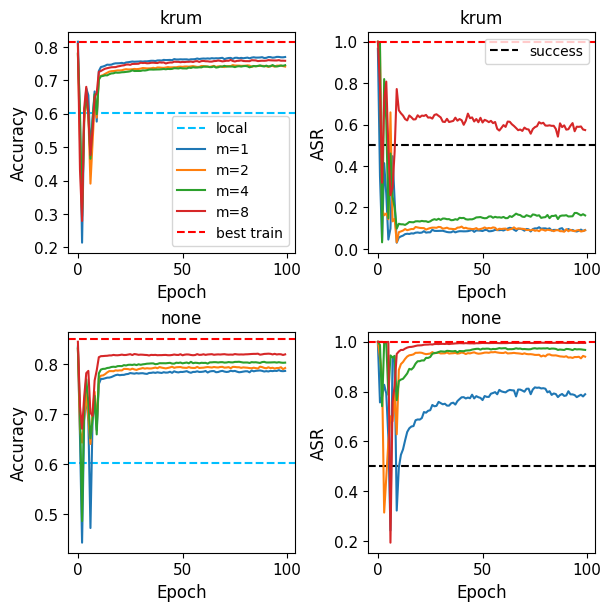

In [20]:
import matplotlib.pyplot as plt

# total rows = defenses × attacks, two columns (clean / ASR)
n_rows = len(defenses) * len(attacks)
n_cols = 2

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(6, 3 * len(defenses)),
    constrained_layout=True
)
# after creating fig,axes:
# fig.subplots_adjust(right=0.8)    # leave 20% of figure width for legends
# ensure axes is always 2D
axes = axes.reshape(n_rows, n_cols)


for i, defense in enumerate(defenses):
    # pick out your two baselines
    if fine_tune_size == 500:
        badnet_baseline = next(p for p in prefixes if p.endswith("/fed_avg_opt_fine_tune/"))
    else:
        badnet_baseline = next(p for p in prefixes if p.endswith("/badnet_fed_avg_opt_fine_tune/"))
    blended_baseline = next(p for p in prefixes if p.endswith("/blended/"))

    current_prefixes = [p for p in prefixes if defense in p]
    if defense == "none":
        current_prefixes = [badnet_baseline,]
    # gather logs
    finetune_logs, best_performances = gather_logs_finetune(current_prefixes)
    clip_val = params[defense][fine_tune_size][acceptable_drop]["clip"]

    for j, attack in enumerate(attacks):
        row = i * len(attacks) + j
        ax_clean, ax_asr = axes[row, 0], axes[row, 1]

        # — Clean-accuracy plot —
        # ax_clean.set_title(f"Accuracy – {attack} – {defense}")
        ax_clean.axhline(
            y=best_baseline_perf,
            color="deepskyblue",
            linestyle="--",
            label="local"
        )
        # — ASR plot —
        # ax_asr.set_title(f"ASR – {attack} – {defense}")
        ax_asr.axhline(
            y=attack_threshold_asr,
            color="black",
            linestyle="--",
            label="success"
        )

        # track bests so we can draw hlines later
        best_clean, best_asr = 0.0, 0.0

        # now plot each m
        for prefix in current_prefixes:
            if attack not in prefix:
                continue
            # special case for mom and rob_mom
            if defense == "mom" and "rob_mom" in prefix:
                continue
            logs = finetune_logs[prefix]
            for k, m in enumerate(m_list):
                perf = best_performances[prefix][m]
                best_clean = max(best_clean, perf["clean"])
                best_asr   = max(best_asr,   perf["asr"])

                # pick the run with the desired clip
                runs = [
                    logs[m][uuid]
                    for uuid in logs[m]
                    if int(logs[m][uuid]["clip"]) == clip_val and logs[m][uuid]["seed"] == 0
                ]
                run = runs[0]  # should be exactly one

                ax_clean.plot(run["clean"], label=f"m={int(m)}", color=colors[k])
                ax_asr.plot(run["asr"],
                            # label=f"m={int(m)}",
                            color=colors[k])

        # draw “best training” and “max drop” lines
        ax_clean.axhline(best_clean, color="red",   linestyle="--", label="best train")

        ax_asr.axhline(best_asr, color="red", linestyle="--",
                       # label="best train"
                       )
        if i == 0 and j==0:
            ax_clean.legend(loc="lower right")
            ax_asr.legend(loc="upper right")

axes[0,0].set_xlabel("Epoch", fontsize=12)
axes[0,0].tick_params(labelsize=11)
axes[0,0].set_ylabel("Accuracy", fontsize=12)
axes[0, 1].set_xlabel("Epoch", fontsize=12)
axes[0,1].tick_params(labelsize=11)
axes[0, 1].set_ylabel("ASR", fontsize=12)
axes[1,0].set_xlabel("Epoch", fontsize=12)
axes[1,0].tick_params(labelsize=11)
axes[1,0].set_ylabel("Accuracy", fontsize=12)
axes[1, 1].set_xlabel("Epoch", fontsize=12)
axes[1,1].tick_params(labelsize=11)
axes[1, 1].set_ylabel("ASR", fontsize=12)
axes[0, 0].set_title(defenses[0])
axes[0, 1].set_title(defenses[0])
axes[1, 0].set_title(defenses[1])
axes[1, 1].set_title(defenses[1])

#
# finally, show them all at once
plt.savefig("figure_9.pdf", dpi=800,    )# bbox_inches="tight",
    #pad_inches=0.1)

plt.show()

# Figure 10

In [21]:
fine_tune_size = 500
acceptable_drop = 0.2
# getting the correct values and prefixes for the new fine-tune size
base_path = f"../saved_models/lr_0_01_ft_{fine_tune_size}_k_0_2/"
prefixes = []
for end_prefix in os.listdir(base_path):
    if os.path.isdir(os.path.join(base_path, end_prefix)):
        prefixes.append(os.path.join(base_path, end_prefix) + "/")
print(prefixes)

prefix = f"../saved_models/lr_0_01_ft_{fine_tune_size}_k_0_2/local_finetune_set_training/"
baseline_log = {}
baseline_lrs = {}
best_baseline_lr = None
best_baseline_perf = 0
for uuid in os.listdir(prefix):
    if os.path.isdir(os.path.join(prefix, uuid)):
        save_dir = os.path.join(prefix, uuid)
        logger = Logger(save_folder=save_dir, read_only=True, auto_load_progress=True)
        if logger.autoload_succeeded:
            progress = logger.progress
            if progress.client_args.benign_lr in list(baseline_lrs.keys()):
                # multiple models with this lr
                print(f"More than one model with lr: {progress.client_args.benign_lr}.")
                baseline_lrs[progress.client_args.benign_lr].append(uuid)
            else:
                baseline_lrs[progress.client_args.benign_lr] = [uuid,]

            baseline_log[uuid] = {
                "clean": progress.global_test_accuracies,
                "asr": progress.backdoor_asrs,
                "name": progress.env_args.model_file,
                "lr": progress.client_args.benign_lr
            }
            if max(progress.global_test_accuracies) > best_baseline_perf:
                best_baseline_perf = max(progress.global_test_accuracies)
                best_baseline_lr = progress.client_args.benign_lr

['../saved_models/lr_0_01_ft_500_k_0_2/replacement_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/replacement_vs_all/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_norm_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_rob_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_krum_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/local_finetune_set_training/', '../saved_models/lr_0_01_ft_500_k_0_2/fmn_blended/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_replacement_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_rob_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_krum_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/fmn_badnet/', '../saved_models/lr_0_01_ft_500_k_0_2/fed_avg_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_norm_opt_fine_tune/', '../saved_models

krum ['../saved_models/lr_0_01_ft_500_k_0_2/badnet_krum_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_krum_opt_fine_tune/'] 5
none ['../saved_models/lr_0_01_ft_500_k_0_2/fed_avg_opt_fine_tune/'] 5


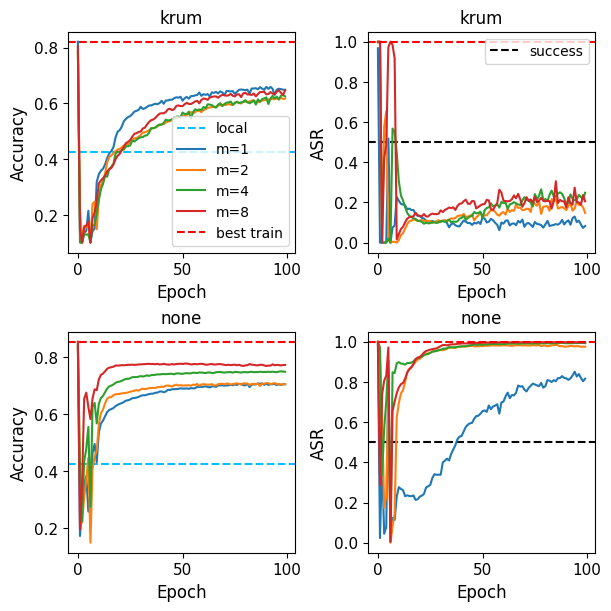

In [22]:
import matplotlib.pyplot as plt

# total rows = defenses × attacks, two columns (clean / ASR)
n_rows = len(defenses) * len(attacks)
n_cols = 2

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(6, 3 * len(defenses)),
    constrained_layout=True
)
# after creating fig,axes:
# fig.subplots_adjust(right=0.8)    # leave 20% of figure width for legends
# ensure axes is always 2D
axes = axes.reshape(n_rows, n_cols)


for i, defense in enumerate(defenses):
    # pick out your two baselines
    if fine_tune_size == 500:
        badnet_baseline = next(p for p in prefixes if p.endswith("/fed_avg_opt_fine_tune/"))
    else:
        badnet_baseline = next(p for p in prefixes if p.endswith("/badnet_fed_avg_opt_fine_tune/"))
    blended_baseline = next(p for p in prefixes if p.endswith("/blended/"))

    current_prefixes = [p for p in prefixes if defense in p]
    if defense == "none":
        current_prefixes = [badnet_baseline,]
    # gather logs
    finetune_logs, best_performances = gather_logs_finetune(current_prefixes)
    clip_val = params[defense][fine_tune_size][acceptable_drop]["clip"]
    print(defense, current_prefixes, clip_val)
    for j, attack in enumerate(attacks):
        row = i * len(attacks) + j
        ax_clean, ax_asr = axes[row, 0], axes[row, 1]

        # — Clean-accuracy plot —
        # ax_clean.set_title(f"Accuracy – {attack} – {defense}")
        ax_clean.axhline(
            y=best_baseline_perf,
            color="deepskyblue",
            linestyle="--",
            label="local"
        )
        # — ASR plot —
        # ax_asr.set_title(f"ASR – {attack} – {defense}")
        ax_asr.axhline(
            y=attack_threshold_asr,
            color="black",
            linestyle="--",
            label="success"
        )

        # track bests so we can draw hlines later
        best_clean, best_asr = 0.0, 0.0

        # now plot each m
        for prefix in current_prefixes:
            if not (defense == "none" and prefix.endswith("fed_avg_opt_fine_tune/")):  # 500 has different naming scheme than 2000
                if attack not in prefix:
                    continue
            # special case for mom and rob_mom
            if defense == "mom" and "rob_mom" in prefix:
                continue
            logs = finetune_logs[prefix]
            for k, m in enumerate(m_list):
                perf = best_performances[prefix][m]
                best_clean = max(best_clean, perf["clean"])
                best_asr   = max(best_asr,   perf["asr"])

                # pick the run with the desired clip
                runs = [
                    logs[m][uuid]
                    for uuid in logs[m]
                    if int(logs[m][uuid]["clip"]) == clip_val and logs[m][uuid]["seed"] == 0
                ]
                run = runs[0]  # should be exactly one

                ax_clean.plot(run["clean"], label=f"m={int(m)}", color=colors[k])
                ax_asr.plot(run["asr"],
                            # label=f"m={int(m)}",
                            color=colors[k])

        # draw “best training” and “max drop” lines
        ax_clean.axhline(best_clean, color="red",   linestyle="--", label="best train")

        ax_asr.axhline(best_asr, color="red", linestyle="--",
                       # label="best train"
                       )
        if i == 0 and j==0:
            ax_clean.legend(loc="lower right")
            ax_asr.legend(loc="upper right")

axes[0,0].set_xlabel("Epoch", fontsize=12)
axes[0,0].tick_params(labelsize=11)
axes[0,0].set_ylabel("Accuracy", fontsize=12)
axes[0, 1].set_xlabel("Epoch", fontsize=12)
axes[0,1].tick_params(labelsize=11)
axes[0, 1].set_ylabel("ASR", fontsize=12)
axes[1,0].set_xlabel("Epoch", fontsize=12)
axes[1,0].tick_params(labelsize=11)
axes[1,0].set_ylabel("Accuracy", fontsize=12)
axes[1, 1].set_xlabel("Epoch", fontsize=12)
axes[1,1].tick_params(labelsize=11)
axes[1, 1].set_ylabel("ASR", fontsize=12)
axes[0, 0].set_title(defenses[0])
axes[0, 1].set_title(defenses[0])
axes[1, 0].set_title(defenses[1])
axes[1, 1].set_title(defenses[1])
#
# finally, show them all at once
plt.savefig("figure_10.pdf", dpi=800,    )# bbox_inches="tight",
    #pad_inches=0.1)

plt.show()

In [23]:
defenses = old_defenses
attacks = old_attacks

# Figure 8


In [24]:
old_defenses = defenses
old_attacks = attacks
defenses = ["krum",]
attacks = ["badnet", ]
fine_tune_sizes_to_try = [100, 500, 1000, 1500, 2000, 5000]
m = 8

{0, 1, 2, 3, 4}
100 [26.288887858390808, 14.388889074325562, 26.866665482521057, 17.311111092567444, 67.69999861717224]
{0, 1, 2, 3, 4}
500 [24.05555546283722, 16.144444048404694, 39.46666717529297, 7.266666740179062, 32.61111080646515]
{0, 1, 2, 3, 4}
1000 [11.46666705608368, 13.244444131851196, 8.322222530841827, 13.699999451637268, 9.41111147403717]
{0, 1, 2, 3, 4}
1500 [13.322222232818604, 25.71111023426056, 23.74444454908371, 12.666666507720947, 11.988888680934906]
{0, 1, 2, 3, 4}
2000 [16.633333265781403, 16.555555164813995, 32.8555554151535, 22.75555580854416, 28.733333945274353]
{0, 1, 2, 3, 4}
5000 [8.411110937595367, 9.255556017160416, 9.333333373069763, 6.633333116769791, 8.044444769620895]
[99.97555613517761, 99.98888969421387, 99.98888969421387, 99.99555587768555, 99.9911117553711, 99.83555555343628]


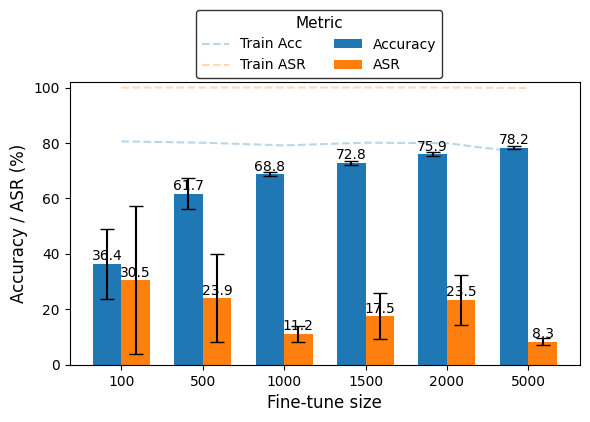

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.lines import Line2D

for defense in defenses:
    # 1) Gather the means and compute 95% CIs for each ft size
    accs, asrs = [], []
    acc_errs, asr_errs = [], []
    baseline_accs, baseline_asrs = [], []
    for i, fine_tune_size in enumerate(fine_tune_sizes_to_try):
        key  = f"../saved_models/varying_ft_size_exp/fine_tune_{fine_tune_size}/{defense}/"
        logs = gather_logs_finetune([key])[0]

        baseline_logs = gather_logs([key])[0]
        baseline_data = baseline_logs[key][m]
        runs = [u for u in baseline_data]
        baseline_acc = 0
        baseline_asr = 0
        for uuid in runs:
            baseline_acc += baseline_data[uuid]['clean'][-1]*100
            baseline_asr += baseline_data[uuid]['asr'][-1]*100
        baseline_acc /= len(runs)
        baseline_asr /= len(runs)
        baseline_accs.append(baseline_acc)
        baseline_asrs.append(baseline_asr)

        # collect per-seed end-of-run values
        seeds = set()
        acc_vals, asr_vals = [], []
        for uuid in logs[key][m]:
            assert logs[key][m][uuid]["seed"] not in seeds
            seeds.add(logs[key][m][uuid]["seed"])
            acc_vals.append(logs[key][m][uuid]['clean'][-1] * 100)
            asr_vals.append(logs[key][m][uuid]['asr'][-1]   * 100)
        print(seeds)
        # if fine_tune_size == 100 or fine_tune_size == 500:
        print(fine_tune_size, asr_vals)
        arr_acc = np.array(acc_vals)
        arr_asr = np.array(asr_vals)
        mean_acc = arr_acc.mean()
        mean_asr = arr_asr.mean()
        # use scipy to get exact 95% t‐interval half‐width
        sem_acc = stats.sem(arr_acc, ddof=1)
        sem_asr = stats.sem(arr_asr, ddof=1)
        df_acc = len(arr_acc) - 1
        df_asr = len(arr_asr) - 1
        ci_acc = stats.t.ppf(0.975, df_acc) * sem_acc
        ci_asr = stats.t.ppf(0.975, df_asr) * sem_asr

        accs.append(mean_acc)
        asrs.append(mean_asr)
        acc_errs.append(ci_acc)
        asr_errs.append(ci_asr)

    # 2) Bar positions
    x     = np.arange(len(fine_tune_sizes_to_try))
    width = 0.35

    # 3) Make the plot with error bars
    fig, ax = plt.subplots(figsize=(6, 4))
    bars_acc = ax.bar(
        x - width/2, accs, width,
        yerr=acc_errs, capsize=5,
        label="Accuracy", color='C0', zorder=1
    )
    bars_asr = ax.bar(
        x + width/2, asrs, width,
        yerr=asr_errs, capsize=5,
        label="ASR",      color='C1', zorder=1
    )
    ax.plot(x, baseline_accs, color="C0", label="Train Acc", alpha=0.3, zorder=0, linestyle="--")
    ax.plot(x, baseline_asrs, color="C1", label="Train ASR", alpha=0.3, zorder=0, linestyle="--")
    print(baseline_asrs)
    # 4) Adjust y‐limits with padding
    all_vals = accs + asrs + baseline_accs + baseline_asrs
    vmin, vmax = min(all_vals), max(all_vals)
    pad = (vmax - vmin) * 0.1
    ax.set_ylim(max(vmin - pad, 0), min(vmax + pad, 102))

    # 5) Annotate each bar
    for bar in bars_acc + bars_asr:
        h = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            h + pad*0.02,
            f"{h:.1f}",
            ha='center', va='bottom',
            fontsize=10
        )

    # 6) Labels & ticks
    ax.set_xticks(x)
    ax.set_xticklabels(fine_tune_sizes_to_try)
    ax.set_xlabel("Fine-tune size", fontsize=12)
    ax.set_ylabel("Accuracy / ASR (%)", fontsize=12)
    # ax.set_title(defense.title(), fontsize=14)
    ax.tick_params(labelsize=10)

    # 7) Legend above
    handles, labels = ax.get_legend_handles_labels()
    legend = fig.legend(
        handles, labels,
        title="Metric",
        loc="upper center",
        bbox_to_anchor=(0.54, 1.06),
        ncol=2,
        frameon=True,
        facecolor="white",
        edgecolor="black",
        fontsize=10,
        title_fontsize=11
    )

    # 8) Layout tweaks & save
    fig.subplots_adjust(top=0.85)
    plt.tight_layout(rect=[0,0,1,0.9])
    plt.savefig(
        f"figure_8.pdf",
        dpi=800,
        bbox_inches="tight",
        pad_inches=0.1,
        bbox_extra_artists=[legend]
    )
    plt.show()

In [26]:
defenses = old_defenses
attacks = old_attacks

# Table 2

In [27]:
fine_tune_size = 500

base_path = f"../saved_models/lr_0_01_ft_{fine_tune_size}_k_0_2/"
prefixes = []
for end_prefix in os.listdir(base_path):
    if os.path.isdir(os.path.join(base_path, end_prefix)):
        prefixes.append(os.path.join(base_path, end_prefix) + "/")
print(prefixes)

prefix = f"../saved_models/lr_0_01_ft_{fine_tune_size}_k_0_2/local_finetune_set_training/"
baseline_log = {}
baseline_lrs = {}
best_baseline_lr = None
best_baseline_perf = 0
for uuid in os.listdir(prefix):
    if os.path.isdir(os.path.join(prefix, uuid)):
        save_dir = os.path.join(prefix, uuid)
        logger = Logger(save_folder=save_dir, read_only=True, auto_load_progress=True)
        if logger.autoload_succeeded:
            progress = logger.progress
            if progress.client_args.benign_lr in list(baseline_lrs.keys()):
                # multiple models with this lr
                print(f"More than one model with lr: {progress.client_args.benign_lr}.")
                baseline_lrs[progress.client_args.benign_lr].append(uuid)
            else:
                baseline_lrs[progress.client_args.benign_lr] = [uuid,]

            baseline_log[uuid] = {
                "clean": progress.global_test_accuracies,
                "asr": progress.backdoor_asrs,
                "name": progress.env_args.model_file,
                "lr": progress.client_args.benign_lr
            }
            if max(progress.global_test_accuracies) > best_baseline_perf:
                best_baseline_perf = max(progress.global_test_accuracies)
                best_baseline_lr = progress.client_args.benign_lr

['../saved_models/lr_0_01_ft_500_k_0_2/replacement_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/replacement_vs_all/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_norm_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_rob_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_krum_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/local_finetune_set_training/', '../saved_models/lr_0_01_ft_500_k_0_2/fmn_blended/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_replacement_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_rob_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_krum_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/fmn_badnet/', '../saved_models/lr_0_01_ft_500_k_0_2/fed_avg_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_norm_opt_fine_tune/', '../saved_models

In [28]:
import pandas as pd

include_no_defense = True

rows = []
for defense in (defenses + ["none"] if include_no_defense else defenses):
    # assemble exactly the same prefixes as in your plotting code
    current_prefixes = [p for p in prefixes if defense in p]
    if fine_tune_size == 500:
        badnet_baseline = next(p for p in prefixes if p.endswith("/fed_avg_opt_fine_tune/"))
    else:
        badnet_baseline = next(p for p in prefixes if p.endswith("/badnet_fed_avg_opt_fine_tune/"))
    blended_baseline = next(p for p in prefixes if p.endswith("/blended/"))
    current_prefixes += [badnet_baseline, blended_baseline]

    # get both logs
    train_logs, _ = gather_logs(current_prefixes)
    ft_logs,    _ = gather_logs_finetune(current_prefixes)

    for attack in attacks:
        for m in m_list:
            # find the exact prefix for this (defense,attack) in each log
            if defense == "none":
                train_keys = [badnet_baseline, ] if attack == "badnet" else [blended_baseline, ]
            else:
                train_keys = [
                    p for p in current_prefixes
                    if defense in p and attack in p
                      and p not in (badnet_baseline, blended_baseline)
                ]
            if defense == "mom":
                train_keys = [p for p in train_keys if "rob_mom" not in p]
            assert len(train_keys) == 1
            train_key = train_keys[0]
            ft_key = train_key.replace("/fed_avg_opt/", "/fed_avg_opt_fine_tune/") \
                              .replace("/badnet_fed_avg_opt/", "/badnet_fed_avg_opt_fine_tune/")

# --- Training: last‐epoch ---
            tdata = train_logs[train_key][m]
            seeds = set()
            train_acc = 0
            train_asr = 0
            ft_acc = 0
            ft_asr = 0
            for tuuid in tdata.keys():
                assert tdata[tuuid]["seed"] not in seeds  # two runs with the same seed
                seeds.add(tdata[tuuid]["seed"])
                clean_curve = tdata[tuuid]['clean']
                asr_curve   = tdata[tuuid]['asr']
            # could have multiple
            # assert len(train_logs[train_key][m].keys()) == 1
            # tuuid = next(iter(tdata))

                last_train_acc = clean_curve[-1]
                last_train_asr = asr_curve[-1]
                train_acc += last_train_acc
                train_asr += last_train_asr
            # best_train_acc = max(clean_curve)
            # best_train_idx = clean_curve.index(best_train_acc)
            # asr_at_best_train = asr_curve[best_train_idx]
            ft_seeds = set()
            # --- Fine‐tune: last‐epoch ---
            fdata = ft_logs[ft_key][m]
            clip_val = params[defense][fine_tune_size][acceptable_drops[fine_tune_size]]['clip']
            for fuuid in fdata.keys():
                if int(fdata[fuuid]["clip"]) == clip_val:
                    assert fdata[fuuid]["seed"] not in ft_seeds  # two runs with the same seed
                    ft_seeds.add(fdata[fuuid]["seed"])
            # we need to use the fuuid with the correct clip value
            # runs = [
            #         uuid
            #         for uuid in fdata
            #         if int(fdata[uuid]["clip"]) == clip_val
            #     ]
            # assert len(runs) == 1
            # fuuid = runs[0]  # should be exactly one
            # fuuid = next(iter(fdata))
                    clean_ft = fdata[fuuid]['clean']
                    asr_ft   = fdata[fuuid]['asr']

                    last_ft_acc = clean_ft[-1]
                    last_ft_asr = asr_ft[-1]

                    ft_acc += last_ft_acc
                    ft_asr += last_ft_asr
            # best_ft_acc = max(clean_ft)
            # best_ft_idx = clean_ft.index(best_ft_acc)
            # asr_at_best_ft = asr_ft[best_ft_idx]
            if ft_seeds != seeds: print(f"Warning, training seeds {seeds} are not the same as fine-tuning seeds {ft_seeds} for {defense} {attack} {m} {clip_val}")
            # assert ft_seeds == seeds, print(defense, attack, m, seeds, ft_seeds)
            # record row
            rows.append({
                'defense': defense.replace("_", " ").title(),
                'attack':  attack.title(),
                'm':        m,
                'train_acc': train_acc / len(seeds),
                'train_asr': train_asr / len(seeds),
                'ft_acc':   ft_acc / len(ft_seeds),
                'ft_asr':   ft_asr / len(ft_seeds),
                # 'train_acc': best_train_acc,
                # 'train_asr': asr_at_best_train,
                # 'ft_acc':   best_ft_acc,
                # 'ft_asr':   asr_at_best_ft,
            })


# make DataFrame
df = pd.DataFrame(rows)

# Compute the “delta” columns
df['acc_diff'] = df['ft_acc'] - df['train_acc']
# df['asr_diff'] = df['ft_asr'] - df['train_asr']

# if you want a nicer pivoted layout: one row per (defense,attack), columns multi-indexed by (‘train’,‘ft’) × m
table = df.pivot_table(
    index=['defense','attack'],
    columns='m',
    values=['train_acc','train_asr','ft_acc', 'acc_diff', 'ft_asr'],
)

for col in table.columns:
    table[col] = table[col].apply(lambda x: f"{x*100:.2f}")

table = table.swaplevel(0, 1, axis=1)

# sort so the m’s run in order
table = table.sort_index(axis=1, level=0)
metric_order = ['train_acc','train_asr','ft_acc','acc_diff', 'ft_asr']
table = table.reindex(metric_order, level=1, axis=1)

table = table.rename(
    columns=lambda metric: metric.replace('_', ' '),
    level=1,
)

# moving None at the end of the rows
special = "None"
current = list(table.index)

# split into “others” and “special”
others  = [idx for idx in current if idx[0] != special]
specials = [idx for idx in current if idx[0] == special]
new_order = others + specials
table = table.reindex(new_order)
print(table)

# or simply
# print(df)

# and if you want to save:
table.to_csv(f"summary_table_{fine_tune_size}.csv")


m                       1                                          2  \
                train acc train asr ft acc acc diff ft asr train acc   
defense attack                                                         
Krum    Badnet      81.39     97.40  64.12   -17.26   9.69     79.35   
        Blended     75.12     99.86  59.75   -15.37   7.03     67.28   
Mom     Badnet      84.53      5.66  32.97   -51.57  12.23     83.99   
        Blended     84.54      5.28  37.83   -46.70   6.54     83.42   
Norm    Badnet      88.23     89.25  72.76   -15.47  19.96     87.88   
        Blended     88.32     99.16  74.64   -13.68  10.74     88.14   
Rob Mom Badnet      84.46      5.14  36.07   -48.40  13.89     84.05   
        Blended     84.68      3.87  56.59   -28.09   4.26     83.84   
None    Badnet      83.89     99.41  70.44   -13.45  83.41     83.09   
        Blended     82.64     94.65  69.40   -13.25  39.87     81.98   

m                                                        4     

In [29]:
# bolding and other mutations for highlighting
import re
def parse_val(s: str) -> float:
    try:
        return float(s)
    except:
        # strip off any \textbf{…}
        # inner = s.replace(r"\textbf{","").replace("}","")
        inner = re.sub(r"[^\d.]", "", s)
        return float(inner)

# 1) Bold the highest fine‐tune acc in each (defense,attack) row
# for idx in table.index:
#     # grab all ft_acc values across m
#     ft_accs = {
#         m: parse_val(table.loc[idx, (m, 'ft acc')])
#         for m in m_list
#     }
#     best_m = max(ft_accs, key=ft_accs.get)
#     old = table.loc[idx, (best_m, 'ft acc')]
#     table.loc[idx, (best_m, 'ft acc')] = rf"\textbf{{{old}}}"

for idx in table.index:
    for m in m_list:
        val = parse_val(table.loc[idx, (m, 'train asr')])
        if val < 50.0:
            old = table.loc[idx, (m, 'train asr')]
            table.loc[idx, (m, 'train asr')] = rf"\textbf{{{old}}}"

        val = parse_val(table.loc[idx, (m, 'ft asr')])
        if val < 50.0:
            old = table.loc[idx, (m, 'ft asr')]
            table.loc[idx, (m, 'ft asr')] = rf"\textbf{{{old}}}"

# we also want to underline the best accuracy per m value
for m in m_list:
    train_accs = {idx: parse_val(table.loc[idx, (m, 'train acc')]) for idx in table.index}
    best_idx = max(train_accs, key=train_accs.get)
    old = table.loc[best_idx, (m, 'train acc')]
    table.loc[best_idx, (m, 'train acc')] = rf"\underline{{{old}}}"

    ft_accs = {idx: parse_val(table.loc[idx, (m, 'ft acc')]) for idx in table.index}
    best_idx = max(ft_accs, key=ft_accs.get)
    old = table.loc[best_idx, (m, 'ft acc')]
    table.loc[best_idx, (m, 'ft acc')] = rf"\underline{{{old}}}"

    # we also want to color red the ft acc if they are below the local accuracy
    for idx in table.index:
        for m in m_list:
            val = parse_val(table.loc[idx, (m, 'ft acc')])
            if val < best_baseline_perf:
                old = table.loc[idx, (m, 'ft acc')]
                table.loc[idx, (m, 'ft acc')] = rf"{{\color{{red}} {{{old}}} }}"


In [30]:
# latex part

groups = {
    r"$m=1,2$": [1,2],
    r"$m=4,8$": [4,8],
}

# shared args for each sub-table
latex_kwargs = dict(
    index_names=True,
    multicolumn=True,
    multicolumn_format='c',
    multirow=True,
    escape=False,
    float_format="%.2f",
    caption=None,      # we’ll do one overall caption
    label=None,        # same for label
)

# render each group to its own LaTeX tabular
latex_blocks = []
for title, ms in groups.items():
    sub = table.loc[:, table.columns.get_level_values("m").isin(ms)]
    # add a little comment line above each block for context:
    header = f"% ------- {title} -------\n"
    body   = sub.to_latex(**latex_kwargs)
    latex_blocks.append(header + body)

# glue them together with a midrule (or a vertical skip)
# body = ("\n\\midrule\n\n").join(latex_blocks)
body = ("\n\\end{adjustbox}\n   \\begin{adjustbox}{width=0.9\\textwidth}\n").join(latex_blocks)

# wrap in one `table` environment
full = f"""
\\begin{{table*}}[ht]
  \\centering
  \\caption{{Performance summary: training \\& fine‐tune with sample size {fine_tune_size}. We bold the ASR values under the success threshold (50\\%) and underline the best training and fine-tuning accuracy per m (number of malicious clients). "acc" stands for accuracy and "ft" stands for fine-tuning. $n=20$ total clients. Results are averaged over three runs.}}
  \\label{{tab:perf_summary_{fine_tune_size}}}
  \\begin{{adjustbox}}{{width=0.9\\textwidth}}

{body}
\\end{{adjustbox}}
\\end{{table*}}
"""

import re
full = re.sub(r"\\cline\{(\d+)-(\d+)\}",
             r"\\cmidrule(lr){\1-\2}",
             full)

# write to disk
with open(f"summary_table_{fine_tune_size}.tex", "w") as f:
    f.write(full)

print(full)


\begin{table*}[ht]
  \centering
  \caption{Performance summary: training \& fine‐tune with sample size 500. We bold the ASR values under the success threshold (50\%) and underline the best training and fine-tuning accuracy per m (number of malicious clients). "acc" stands for accuracy and "ft" stands for fine-tuning. $n=20$ total clients. Results are averaged over three runs.}
  \label{tab:perf_summary_500}
  \begin{adjustbox}{width=0.9\textwidth}

% ------- $m=1,2$ -------
\begin{tabular}{llllllllllll}
\toprule
 & m & \multicolumn{5}{c}{1} & \multicolumn{5}{c}{2} \\
 &  & train acc & train asr & ft acc & acc diff & ft asr & train acc & train asr & ft acc & acc diff & ft asr \\
defense & attack &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{Krum} & Badnet & 81.39 & 97.40 & 64.12 & -17.26 & \textbf{9.69} & 79.35 & 99.65 & 62.81 & -16.54 & \textbf{14.71} \\
 & Blended & 75.12 & 99.86 & 59.75 & -15.37 & \textbf{7.03} & 67.28 & 99.01 & 57.43 & -9.85 & \textbf{26.47} \\
\cmid

# Table 1

In [31]:
fine_tune_size = 2000

base_path = f"../saved_models/lr_0_01_ft_{fine_tune_size}_k_0_2/"
prefixes = []
for end_prefix in os.listdir(base_path):
    if os.path.isdir(os.path.join(base_path, end_prefix)):
        prefixes.append(os.path.join(base_path, end_prefix) + "/")
print(prefixes)

prefix = f"../saved_models/lr_0_01_ft_{fine_tune_size}_k_0_2/local_finetune_set_training/"
baseline_log = {}
baseline_lrs = {}
best_baseline_lr = None
best_baseline_perf = 0
for uuid in os.listdir(prefix):
    if os.path.isdir(os.path.join(prefix, uuid)):
        save_dir = os.path.join(prefix, uuid)
        logger = Logger(save_folder=save_dir, read_only=True, auto_load_progress=True)
        if logger.autoload_succeeded:
            progress = logger.progress
            if progress.client_args.benign_lr in list(baseline_lrs.keys()):
                # multiple models with this lr
                print(f"More than one model with lr: {progress.client_args.benign_lr}.")
                baseline_lrs[progress.client_args.benign_lr].append(uuid)
            else:
                baseline_lrs[progress.client_args.benign_lr] = [uuid,]

            baseline_log[uuid] = {
                "clean": progress.global_test_accuracies,
                "asr": progress.backdoor_asrs,
                "name": progress.env_args.model_file,
                "lr": progress.client_args.benign_lr
            }
            if max(progress.global_test_accuracies) > best_baseline_perf:
                best_baseline_perf = max(progress.global_test_accuracies)
                best_baseline_lr = progress.client_args.benign_lr

['../saved_models/lr_0_01_ft_2000_k_0_2/badnet_rob_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/badnet_fed_avg_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended_norm_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended_replacement_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/local_finetune_set_training/', '../saved_models/lr_0_01_ft_2000_k_0_2/badnet_replacement_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended_krum_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/replacement_vs_all/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/dirichlet_krum_test/', '../saved_models/lr_0_01_ft_2000_k_0_2/badnet_krum_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/fmn_blended/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended_rob_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/badnet_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_2000_k_0_2/blended

In [32]:
import pandas as pd

include_no_defense = True

rows = []
for defense in (defenses + ["none"] if include_no_defense else defenses):
    # assemble exactly the same prefixes as in your plotting code
    current_prefixes = [p for p in prefixes if defense in p]
    if fine_tune_size == 500:
        badnet_baseline = next(p for p in prefixes if p.endswith("/fed_avg_opt_fine_tune/"))
    else:
        badnet_baseline = next(p for p in prefixes if p.endswith("/badnet_fed_avg_opt_fine_tune/"))
    blended_baseline = next(p for p in prefixes if p.endswith("/blended/"))
    current_prefixes += [badnet_baseline, blended_baseline]

    # get both logs
    train_logs, _ = gather_logs(current_prefixes)
    ft_logs,    _ = gather_logs_finetune(current_prefixes)

    for attack in attacks:
        for m in m_list:
            # find the exact prefix for this (defense,attack) in each log
            if defense == "none":
                train_keys = [badnet_baseline, ] if attack == "badnet" else [blended_baseline, ]
            else:
                train_keys = [
                    p for p in current_prefixes
                    if defense in p and attack in p
                      and p not in (badnet_baseline, blended_baseline)
                ]
            if defense == "mom":
                train_keys = [p for p in train_keys if "rob_mom" not in p]
            assert len(train_keys) == 1
            train_key = train_keys[0]
            ft_key = train_key.replace("/fed_avg_opt/", "/fed_avg_opt_fine_tune/") \
                              .replace("/badnet_fed_avg_opt/", "/badnet_fed_avg_opt_fine_tune/")

# --- Training: last‐epoch ---
            tdata = train_logs[train_key][m]
            seeds = set()
            train_acc = 0
            train_asr = 0
            ft_acc = 0
            ft_asr = 0
            for tuuid in tdata.keys():
                assert tdata[tuuid]["seed"] not in seeds  # two runs with the same seed
                seeds.add(tdata[tuuid]["seed"])
                clean_curve = tdata[tuuid]['clean']
                asr_curve   = tdata[tuuid]['asr']
            # could have multiple
            # assert len(train_logs[train_key][m].keys()) == 1
            # tuuid = next(iter(tdata))

                last_train_acc = clean_curve[-1]
                last_train_asr = asr_curve[-1]
                train_acc += last_train_acc
                train_asr += last_train_asr
            # best_train_acc = max(clean_curve)
            # best_train_idx = clean_curve.index(best_train_acc)
            # asr_at_best_train = asr_curve[best_train_idx]
            ft_seeds = set()
            # --- Fine‐tune: last‐epoch ---
            fdata = ft_logs[ft_key][m]
            clip_val = params[defense][fine_tune_size][acceptable_drops[fine_tune_size]]['clip']
            for fuuid in fdata.keys():
                if int(fdata[fuuid]["clip"]) == clip_val:
                    assert fdata[fuuid]["seed"] not in ft_seeds  # two runs with the same seed
                    ft_seeds.add(fdata[fuuid]["seed"])
            # we need to use the fuuid with the correct clip value
            # runs = [
            #         uuid
            #         for uuid in fdata
            #         if int(fdata[uuid]["clip"]) == clip_val
            #     ]
            # assert len(runs) == 1
            # fuuid = runs[0]  # should be exactly one
            # fuuid = next(iter(fdata))
                    clean_ft = fdata[fuuid]['clean']
                    asr_ft   = fdata[fuuid]['asr']

                    last_ft_acc = clean_ft[-1]
                    last_ft_asr = asr_ft[-1]

                    ft_acc += last_ft_acc
                    ft_asr += last_ft_asr
            # best_ft_acc = max(clean_ft)
            # best_ft_idx = clean_ft.index(best_ft_acc)
            # asr_at_best_ft = asr_ft[best_ft_idx]
            if ft_seeds != seeds: print(f"Warning, training seeds {seeds} are not the same as fine-tuning seeds {ft_seeds} for {defense} {attack} {m} {clip_val}")
            # assert ft_seeds == seeds, print(defense, attack, m, seeds, ft_seeds)
            # record row
            rows.append({
                'defense': defense.replace("_", " ").title(),
                'attack':  attack.title(),
                'm':        m,
                'train_acc': train_acc / len(seeds),
                'train_asr': train_asr / len(seeds),
                'ft_acc':   ft_acc / len(ft_seeds),
                'ft_asr':   ft_asr / len(ft_seeds),
                # 'train_acc': best_train_acc,
                # 'train_asr': asr_at_best_train,
                # 'ft_acc':   best_ft_acc,
                # 'ft_asr':   asr_at_best_ft,
            })


# make DataFrame
df = pd.DataFrame(rows)

# Compute the “delta” columns
df['acc_diff'] = df['ft_acc'] - df['train_acc']
# df['asr_diff'] = df['ft_asr'] - df['train_asr']

# if you want a nicer pivoted layout: one row per (defense,attack), columns multi-indexed by (‘train’,‘ft’) × m
table = df.pivot_table(
    index=['defense','attack'],
    columns='m',
    values=['train_acc','train_asr','ft_acc', 'acc_diff', 'ft_asr'],
)

for col in table.columns:
    table[col] = table[col].apply(lambda x: f"{x*100:.2f}")

table = table.swaplevel(0, 1, axis=1)

# sort so the m’s run in order
table = table.sort_index(axis=1, level=0)
metric_order = ['train_acc','train_asr','ft_acc','acc_diff', 'ft_asr']
table = table.reindex(metric_order, level=1, axis=1)
table = table.rename(
    columns=lambda metric: metric.replace('_', ' '),
    level=1,
)

# moving None at the end of the rows
special = "None"
current = list(table.index)

# split into “others” and “special”
others  = [idx for idx in current if idx[0] != special]
specials = [idx for idx in current if idx[0] == special]
new_order = others + specials
table = table.reindex(new_order)
print(table)

# or simply
# print(df)

# and if you want to save:
table.to_csv(f"summary_table_{fine_tune_size}.csv")


m                       1                                          2  \
                train acc train asr ft acc acc diff ft asr train acc   
defense attack                                                         
Krum    Badnet      80.20     96.94  76.15    -4.05  11.74     78.00   
        Blended     73.76     99.83  71.66    -2.10   4.94     62.49   
Mom     Badnet      84.25      5.89  78.66    -5.59   4.83     83.49   
        Blended     84.18      5.94  78.80    -5.38   2.02     83.14   
Norm    Badnet      87.93     90.49  84.23    -3.70  17.33     87.72   
        Blended     88.08     99.08  84.36    -3.72  13.06     87.93   
Rob Mom Badnet      84.17      4.20  81.42    -2.75   4.31     83.80   
        Blended     84.10      5.35  81.42    -2.67   3.20     83.48   
None    Badnet      83.02     99.62  79.01    -4.01  87.47     82.93   
        Blended     82.51     87.60  78.28    -4.24  17.51     81.62   

m                                                        4     

In [33]:


for idx in table.index:
    for m in m_list:
        val = parse_val(table.loc[idx, (m, 'train asr')])
        if val < 50.0:
            old = table.loc[idx, (m, 'train asr')]
            table.loc[idx, (m, 'train asr')] = rf"\textbf{{{old}}}"

        val = parse_val(table.loc[idx, (m, 'ft asr')])
        if val < 50.0:
            old = table.loc[idx, (m, 'ft asr')]
            table.loc[idx, (m, 'ft asr')] = rf"\textbf{{{old}}}"

# we also want to underline the best accuracy per m value
for m in m_list:
    train_accs = {idx: parse_val(table.loc[idx, (m, 'train acc')]) for idx in table.index}
    best_idx = max(train_accs, key=train_accs.get)
    old = table.loc[best_idx, (m, 'train acc')]
    table.loc[best_idx, (m, 'train acc')] = rf"\underline{{{old}}}"

    ft_accs = {idx: parse_val(table.loc[idx, (m, 'ft acc')]) for idx in table.index}
    best_idx = max(ft_accs, key=ft_accs.get)
    old = table.loc[best_idx, (m, 'ft acc')]
    table.loc[best_idx, (m, 'ft acc')] = rf"\underline{{{old}}}"

# we also want to color red the ft acc if they are below the local accuracy
for idx in table.index:
    for m in m_list:
        val = parse_val(table.loc[idx, (m, 'ft acc')])
        if val < best_baseline_perf:
            old = table.loc[idx, (m, 'ft acc')]
            table.loc[idx, (m, 'ft acc')] = rf"{{\color{{red}} {{{old}}} }}"


In [34]:
# latex part

groups = {
    r"$m=1,2$": [1,2],
    r"$m=4,8$": [4,8],
}

# shared args for each sub-table
latex_kwargs = dict(
    index_names=True,
    multicolumn=True,
    multicolumn_format='c',
    multirow=True,
    escape=False,
    float_format="%.2f",
    caption=None,      # we’ll do one overall caption
    label=None,        # same for label
)

# render each group to its own LaTeX tabular
latex_blocks = []
for title, ms in groups.items():
    sub = table.loc[:, table.columns.get_level_values("m").isin(ms)]
    # add a little comment line above each block for context:
    header = f"% ------- {title} -------\n"
    body   = sub.to_latex(**latex_kwargs)
    latex_blocks.append(header + body)

# glue them together with a midrule (or a vertical skip)
# body = ("\n\\midrule\n\n").join(latex_blocks)
body = ("\n\\end{adjustbox}\n   \\begin{adjustbox}{width=0.9\\textwidth}\n").join(latex_blocks)

# wrap in one `table` environment
full = f"""
\\begin{{table*}}[ht]
  \\centering
  \\caption{{Performance summary: training \\& fine‐tune with sample size {fine_tune_size}. We bold the ASR values under the success threshold (50\\%) and underline the best training and fine-tuning accuracy per m (number of malicious clients). "acc" stands for accuracy and "ft" stands for fine-tuning. $n=20$ total clients. Results are averaged over three runs.}}
  \\label{{tab:perf_summary_{fine_tune_size}}}
  \\begin{{adjustbox}}{{width=0.9\\textwidth}}

{body}
\\end{{adjustbox}}
\\end{{table*}}
"""

import re
full = re.sub(r"\\cline\{(\d+)-(\d+)\}",
             r"\\cmidrule(lr){\1-\2}",
             full)

# write to disk
with open(f"summary_table_{fine_tune_size}.tex", "w") as f:
    f.write(full)

print(full)


\begin{table*}[ht]
  \centering
  \caption{Performance summary: training \& fine‐tune with sample size 2000. We bold the ASR values under the success threshold (50\%) and underline the best training and fine-tuning accuracy per m (number of malicious clients). "acc" stands for accuracy and "ft" stands for fine-tuning. $n=20$ total clients. Results are averaged over three runs.}
  \label{tab:perf_summary_2000}
  \begin{adjustbox}{width=0.9\textwidth}

% ------- $m=1,2$ -------
\begin{tabular}{llllllllllll}
\toprule
 & m & \multicolumn{5}{c}{1} & \multicolumn{5}{c}{2} \\
 &  & train acc & train asr & ft acc & acc diff & ft asr & train acc & train asr & ft acc & acc diff & ft asr \\
defense & attack &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{Krum} & Badnet & 80.20 & 96.94 & 76.15 & -4.05 & \textbf{11.74} & 78.00 & 99.48 & 75.11 & -2.89 & \textbf{10.91} \\
 & Blended & 73.76 & 99.83 & 71.66 & -2.10 & \textbf{4.94} & 62.49 & 97.86 & 69.63 & 7.14 & \textbf{9.44} \\
\cmidru

# Table 3
ASR Drop comparison

In [35]:
import pandas as pd

fine_tune_sizes = [500, 2000]
rows = []
vals = {}
for defense in defenses + ["none",]:
    vals[defense] = {}
    for attack in attacks:
        vals[defense][attack] = {}
        for m in m_list:
            vals[defense][attack][m] = {}

for fine_tune_size in fine_tune_sizes:
    base_path = f"../saved_models/lr_0_01_ft_{fine_tune_size}_k_0_2/"
    prefixes = []
    for end_prefix in os.listdir(base_path):
        if os.path.isdir(os.path.join(base_path, end_prefix)):
            prefixes.append(os.path.join(base_path, end_prefix) + "/")
    print(prefixes)
    for defense in defenses + ["none", ]:
        # assemble exactly the same prefixes as in your plotting code
        current_prefixes = [p for p in prefixes if defense in p]
        if fine_tune_size == 500:
            badnet_baseline = next(p for p in prefixes if p.endswith("/fed_avg_opt_fine_tune/"))
        else:
            badnet_baseline = next(p for p in prefixes if p.endswith("/badnet_fed_avg_opt_fine_tune/"))
        blended_baseline = next(p for p in prefixes if p.endswith("/blended/"))
        current_prefixes += [badnet_baseline, blended_baseline]

        # get both logs
        train_logs, _ = gather_logs(current_prefixes)
        ft_logs,    _ = gather_logs_finetune(current_prefixes)

        for attack in attacks:
            for m in m_list:
                # find the exact prefix for this (defense,attack) in each log
                if defense == "none":
                    train_keys = [badnet_baseline, ] if attack == "badnet" else [blended_baseline, ]
                else:
                    train_keys = [
                        p for p in current_prefixes
                        if defense in p and attack in p
                          and p not in (badnet_baseline, blended_baseline)
                    ]
                if defense == "mom":
                    train_keys = [p for p in train_keys if "rob_mom" not in p]
                assert len(train_keys) == 1
                train_key = train_keys[0]
                ft_key = train_key.replace("/fed_avg_opt/", "/fed_avg_opt_fine_tune/") \
                                  .replace("/badnet_fed_avg_opt/", "/badnet_fed_avg_opt_fine_tune/")

        # --- Training: last‐epoch ---
        #         tdata = train_logs[train_key][m]
        #         assert len(train_logs[train_key][m].keys()) == 1
        #         tuuid = next(iter(tdata))
        #         clean_curve = tdata[tuuid]['clean']
        #         asr_curve   = tdata[tuuid]['asr']
        #
        #         last_train_acc = clean_curve[-1]
        #         last_train_asr = asr_curve[-1]
        #         # best_train_acc = max(clean_curve)
        #         # best_train_idx = clean_curve.index(best_train_acc)
        #         # asr_at_best_train = asr_curve[best_train_idx]
        #
        #         # --- Fine‐tune: last‐epoch ---
                fdata = ft_logs[ft_key][m]
                clip_val = params[defense][fine_tune_size][acceptable_drops[fine_tune_size]]['clip']
        #         # we need to use the fuuid with the correct clip value
                ft_acc = 0
                ft_seeds = set()
                for fuuid in fdata.keys():
                    if int(fdata[fuuid]["clip"]) == clip_val:
                        assert fdata[fuuid]["seed"] not in ft_seeds  # two runs with the same seed
                        ft_seeds.add(fdata[fuuid]["seed"])

                # runs = [
                #         uuid
                #         for uuid in fdata
                #         if int(fdata[uuid]["clip"]) == clip_val
                #     ]
                # fuuid = runs[0]  # should be exactly one
                        clean_ft = fdata[fuuid]['clean']
        #         asr_ft   = fdata[fuuid]['asr']

                        last_ft_acc = clean_ft[-1]
                        ft_acc += last_ft_acc
                print(defense, attack, m, fine_tune_size, len(ft_seeds), ft_acc/len(ft_seeds))
                vals[defense][attack][m][fine_tune_size] = ft_acc / len(ft_seeds)
                # last_ft_asr = asr_ft[-1]
                # best_ft_acc = max(clean_ft)
                # best_ft_idx = clean_ft.index(best_ft_acc)
                # asr_at_best_ft = asr_ft[best_ft_idx]

for defense in defenses + ['none',]:
    for attack in attacks:
        for m in m_list:
            to_append_dict = {
                'defense': defense.replace("_", " ").title(),
                'attack':  attack.title(),
                'm':        m,
                f'{fine_tune_sizes[0]}': vals[defense][attack][m][fine_tune_sizes[0]],
                f'{fine_tune_sizes[1]}': vals[defense][attack][m][fine_tune_sizes[1]],
            }
            to_append_dict["diff"] = to_append_dict[f'{fine_tune_sizes[0]}'] - to_append_dict[f'{fine_tune_sizes[1]}']
            rows.append(to_append_dict)
# record row
# rows.append({
#     'defense': defense.replace("_", " ").title(),
#     'attack':  attack.title(),
#     'm':        m,
#     'train_acc': last_train_acc,
#     'train_asr': last_train_asr,
#     'ft_acc':   last_ft_acc,
#     'ft_asr':   last_ft_asr,
#     # 'train_acc': best_train_acc,
#     # 'train_asr': asr_at_best_train,
#     # 'ft_acc':   best_ft_acc,
#     # 'ft_asr':   asr_at_best_ft,
# })


# make DataFrame
df = pd.DataFrame(rows)

# Compute the “delta” columns
# df['asr_diff'] = df['ft_asr'] - df['train_asr']

# if you want a nicer pivoted layout: one row per (defense,attack), columns multi-indexed by (‘train’,‘ft’) × m
table = df.pivot_table(
    index=['defense','attack'],
    columns='m',
    values=[f'{fine_tune_sizes[0]}', f'{fine_tune_sizes[1]}', 'diff'],
)

for col in table.columns:
    table[col] = table[col].apply(lambda x: f"{x*100:.2f}")

table = table.swaplevel(0, 1, axis=1)

# sort so the m’s run in order
table = table.sort_index(axis=1, level=0)
metric_order = [f'{fine_tune_sizes[1]}', f'{fine_tune_sizes[0]}', 'diff']
table = table.reindex(metric_order, level=1, axis=1)
table = table.rename(
    columns=lambda metric: metric.replace('_', ' '),
    level=1,
)

special = "None"
current = list(table.index)

# split into “others” and “special”
others  = [idx for idx in current if idx[0] != special]
specials = [idx for idx in current if idx[0] == special]
new_order = others + specials
table = table.reindex(new_order)

print(table)

# or simply
# print(df)

# and if you want to save:
table.to_csv(f"ft_acc_diff_table.csv")


['../saved_models/lr_0_01_ft_500_k_0_2/replacement_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/replacement_vs_all/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_norm_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_rob_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_krum_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/local_finetune_set_training/', '../saved_models/lr_0_01_ft_500_k_0_2/fmn_blended/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_replacement_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/badnet_rob_mom_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_krum_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/fmn_badnet/', '../saved_models/lr_0_01_ft_500_k_0_2/fed_avg_opt_fine_tune/', '../saved_models/lr_0_01_ft_500_k_0_2/blended_norm_opt_fine_tune/', '../saved_models

In [36]:
# latex part

groups = {
    r"$m=1,2$": [1,2],
    r"$m=4,8$": [4,8],
}

# shared args for each sub-table
latex_kwargs = dict(
    index_names=True,
    multicolumn=True,
    multicolumn_format='c',
    multirow=True,
    escape=False,
    float_format="%.2f",
    caption=None,      # we’ll do one overall caption
    label=None,        # same for label
)

# render each group to its own LaTeX tabular
latex_blocks = []
for title, ms in groups.items():
    sub = table.loc[:, table.columns.get_level_values("m").isin(ms)]
    # add a little comment line above each block for context:
    header = f"% ------- {title} -------\n"
    body   = sub.to_latex(**latex_kwargs)
    latex_blocks.append(header + body)

# glue them together with a midrule (or a vertical skip)
# body = ("\n\\midrule\n\n").join(latex_blocks)
body = ("\n\\end{adjustbox}\n   \\begin{adjustbox}{width=0.95\\columnwidth}\n").join(latex_blocks)

# wrap in one `table` environment
full = f"""
\\begin{{table}}[ht]
  \\centering
  \\caption{{Comparison of post fine-tuning model accuracies for fine-tune sample sizes of 500 (1\%) and 2000 (4\%).}}
  \\label{{tab:ft_acc_diff_table}}
  \\begin{{adjustbox}}{{width=0.95\\columnwidth}}

{body}
\\end{{adjustbox}}
\\end{{table}}
"""

import re
full = re.sub(r"\\cline\{(\d+)-(\d+)\}",
             r"\\cmidrule(lr){\1-\2}",
             full)

# write to disk
with open(f"ft_acc_diff_table.tex", "w") as f:
    f.write(full)

print(full)


\begin{table}[ht]
  \centering
  \caption{Comparison of post fine-tuning model accuracies for fine-tune sample sizes of 500 (1\%) and 2000 (4\%).}
  \label{tab:ft_acc_diff_table}
  \begin{adjustbox}{width=0.95\columnwidth}

% ------- $m=1,2$ -------
\begin{tabular}{llllllll}
\toprule
 & m & \multicolumn{3}{c}{1} & \multicolumn{3}{c}{2} \\
 &  & 2000 & 500 & diff & 2000 & 500 & diff \\
defense & attack &  &  &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{Krum} & Badnet & 76.15 & 64.12 & -12.03 & 75.11 & 62.81 & -12.30 \\
 & Blended & 71.66 & 59.75 & -11.91 & 69.63 & 57.43 & -12.19 \\
\cmidrule(lr){1-8}
\multirow[t]{2}{*}{Mom} & Badnet & 78.66 & 32.97 & -45.69 & 79.11 & 65.93 & -13.19 \\
 & Blended & 78.80 & 37.83 & -40.97 & 78.44 & 37.96 & -40.48 \\
\cmidrule(lr){1-8}
\multirow[t]{2}{*}{Norm} & Badnet & 84.23 & 72.76 & -11.47 & 83.95 & 72.02 & -11.94 \\
 & Blended & 84.36 & 74.64 & -9.72 & 84.10 & 76.07 & -8.03 \\
\cmidrule(lr){1-8}
\multirow[t]{2}{*}{Rob Mom} & Badnet & 81.42 & 36.07 & -4

# Table 4

In [37]:
fine_tune_size = 2000

base_path = f"../saved_models/previous_work_comparison/fine_tune_{fine_tune_size}"
prefixes = []
for end_prefix in os.listdir(base_path):
    if os.path.isdir(os.path.join(base_path, end_prefix)):
        prefixes.append(os.path.join(base_path, end_prefix) + "/")
print(prefixes)

prefix = f"../saved_models/lr_0_01_ft_{fine_tune_size}_k_0_2/local_finetune_set_training/"
baseline_log = {}
baseline_lrs = {}
best_baseline_lr = None
best_baseline_perf = 0
for uuid in os.listdir(prefix):
    if os.path.isdir(os.path.join(prefix, uuid)):
        save_dir = os.path.join(prefix, uuid)
        logger = Logger(save_folder=save_dir, read_only=True, auto_load_progress=True)
        if logger.autoload_succeeded:
            progress = logger.progress
            if progress.client_args.benign_lr in list(baseline_lrs.keys()):
                # multiple models with this lr
                print(f"More than one model with lr: {progress.client_args.benign_lr}.")
                baseline_lrs[progress.client_args.benign_lr].append(uuid)
            else:
                baseline_lrs[progress.client_args.benign_lr] = [uuid,]

            baseline_log[uuid] = {
                "clean": progress.global_test_accuracies,
                "asr": progress.backdoor_asrs,
                "name": progress.env_args.model_file,
                "lr": progress.client_args.benign_lr
            }
            if max(progress.global_test_accuracies) > best_baseline_perf:
                best_baseline_perf = max(progress.global_test_accuracies)
                best_baseline_lr = progress.client_args.benign_lr

['../saved_models/previous_work_comparison/fine_tune_2000/rob_mom/', '../saved_models/previous_work_comparison/fine_tune_2000/krum/', '../saved_models/previous_work_comparison/fine_tune_2000/mom/', '../saved_models/previous_work_comparison/fine_tune_2000/none/', '../saved_models/previous_work_comparison/fine_tune_2000/norm/']


In [38]:
import pandas as pd

defenses = ["krum", "none"]
rows = []
for defense in defenses:
    current_prefixes = [p for p in prefixes if defense in p and not (defense == "mom" and "rob_mom" in p)]
    assert len(current_prefixes) == 1, print(defense, current_prefixes)
    current_prefix = current_prefixes[0]
    # get both logs
    train_logs, _ = gather_logs(current_prefixes)
    ft_logs,    _ = gather_logs_finetune(current_prefixes)

    train_logs = train_logs[current_prefix]
    ft_key = current_prefix.replace("/fed_avg_opt/", "/fed_avg_opt_fine_tune/") \
                  .replace("/badnet_fed_avg_opt/", "/badnet_fed_avg_opt_fine_tune/")
    ft_logs = ft_logs[ft_key]

    assert len(list(train_logs.keys())) == 1 # should only be m=8
    m = list(train_logs.keys())[0]
    tdata = train_logs[m]
    for uuid in train_logs[m]:
        clean_curve = tdata[uuid]['clean']
        asr_curve   = tdata[uuid]['asr']

        last_train_acc = clean_curve[-1]
        last_train_asr = asr_curve[-1]
        # best_train_acc = max(clean_curve)
        # best_train_idx = clean_curve.index(best_train_acc)
        # asr_at_best_train = asr_curve[best_train_idx]

        # --- Fine‐tune: last‐epoch ---
        fdata = ft_logs[m]
        # we need to use the fuuid with the correct clip value
        runs = [
                fuuid
                for fuuid in fdata
                if os.path.splitext(fdata[fuuid]["name"])[0].split("_clip")[0] == os.path.splitext(tdata[uuid]["name"])[0]  # matching the model name
            ]
        assert len(runs) == 1, print(uuid, runs)
        fuuid = runs[0]  # should be exactly one
        # fuuid = next(iter(fdata))
        clean_ft = fdata[fuuid]['clean']
        asr_ft   = fdata[fuuid]['asr']

        last_ft_acc = clean_ft[-1]
        last_ft_asr = asr_ft[-1]
        rows.append({
            'defense': defense.replace("_", " ").title(),
            'attack':  os.path.splitext(tdata[uuid]["name"])[0].title(),
            'train_acc': last_train_acc,
            'train_asr': last_train_asr,
            'ft_acc':   last_ft_acc,
            'ft_asr':   last_ft_asr,
        })

df = pd.DataFrame(rows)
df['acc_diff'] = df['ft_acc'] - df['train_acc']


table = df.pivot_table(
    index=['defense','attack'],
    values=["train_acc", "train_asr", "ft_acc", "acc_diff", "ft_asr"],
)

for col in table.columns:
    table[col] = table[col].apply(lambda x: f"{x*100:.2f}")

# table = table.swaplevel(0, 1, axis=1)

# sort so the m’s run in order
table = table.sort_index(axis=1, level=0)
metric_order = ['train_acc','train_asr','ft_acc','acc_diff', 'ft_asr']
table = table.reindex(metric_order, level=0, axis=1)
table = table.rename(
    columns=lambda metric: metric.replace('_', ' '),
    level=0,
)
table = table.rename(
    index=lambda metric: metric.replace('_', '-'),
    level=1,
)


print(table)

                            train acc train asr ft acc acc diff ft asr
defense attack                                                        
Krum    Badnet                  69.66      3.14  73.94     4.28   3.58
        Blended                 69.66      1.54  73.94     4.28   1.99
        Dba                     73.44      1.90  74.43     0.99   3.82
        Neurotoxin-Badnet       70.69      4.17  72.85     2.16   4.22
        Neurotoxin-Blended      70.69      3.17  72.85     2.16   3.82
        Replacement-Badnet      10.00    100.00  73.38    63.38  14.34
        Replacement-Blended     33.77     99.99  73.37    39.60  15.43
None    Badnet                  84.70    100.00  82.24    -2.46  99.26
        Blended                 82.96    100.00  80.39    -2.57  99.99
        Dba                     83.41      1.39  80.42    -2.99   3.08
        Neurotoxin-Badnet       84.96    100.00  82.14    -2.82  99.04
        Neurotoxin-Blended      83.28    100.00  81.11    -2.17  99.99
      

In [39]:
# bolding and other mutations for highlighting
import re
def parse_val(s: str) -> float:
    try:
        return float(s)
    except:
        # strip off any \textbf{…}
        # inner = s.replace(r"\textbf{","").replace("}","")
        inner = re.sub(r"[^\d.]", "", s)
        return float(inner)

# 1) Bold the highest fine‐tune acc in each (defense,attack) row
# for idx in table.index:
#     # grab all ft_acc values across m
#     ft_accs = {
#         m: parse_val(table.loc[idx, (m, 'ft acc')])
#         for m in m_list
#     }
#     best_m = max(ft_accs, key=ft_accs.get)
#     old = table.loc[idx, (best_m, 'ft acc')]
#     table.loc[idx, (best_m, 'ft acc')] = rf"\textbf{{{old}}}"

for idx in table.index:
    val = parse_val(table.loc[idx, ( 'train asr')])
    if val < 50.0:
        old = table.loc[idx, ( 'train asr')]
        table.loc[idx, ( 'train asr')] = rf"\textbf{{{old}}}"

    val = parse_val(table.loc[idx, 'ft asr'])
    if val < 50.0:
        old = table.loc[idx, ( 'ft asr')]
        table.loc[idx, ( 'ft asr')] = rf"\textbf{{{old}}}"

# we also want to underline the best accuracy per m value
train_accs = {idx: parse_val(table.loc[idx, ( 'train acc')]) for idx in table.index}
best_idx = max(train_accs, key=train_accs.get)
old = table.loc[best_idx, ( 'train acc')]
table.loc[best_idx, ( 'train acc')] = rf"\underline{{{old}}}"

ft_accs = {idx: parse_val(table.loc[idx, ( 'ft acc')]) for idx in table.index}
best_idx = max(ft_accs, key=ft_accs.get)
old = table.loc[best_idx, ( 'ft acc')]
table.loc[best_idx, ( 'ft acc')] = rf"\underline{{{old}}}"

# we also want to color red the ft acc if they are below the local accuracy
for idx in table.index:
    val = parse_val(table.loc[idx, ( 'ft acc')])
    if val < best_baseline_perf:
        old = table.loc[idx, ( 'ft acc')]
        table.loc[idx, ( 'ft acc')] = rf"{{\color{{red}} {{{old}}} }}"


In [40]:
# latex part

# shared args for each sub-table
latex_kwargs = dict(
    index_names=True,
    multicolumn=True,
    multicolumn_format='c',
    multirow=True,
    escape=False,
    float_format="%.2f",
    caption=None,      # we’ll do one overall caption
    label=None,        # same for label
)

# render each group to its own LaTeX tabular
latex_block = table.to_latex(**latex_kwargs)
# glue them together with a midrule (or a vertical skip)
# body = ("\n\\midrule\n\n").join(latex_blocks)
body = latex_block

# wrap in one `table` environment
full = f"""
\\begin{{table}}[ht]
  \\centering
  \\caption{{Comparison of post fine-tuning model accuracies for fine-tune sample sizes of {fine_tune_size}.}}
  \\label{{tab:prev_work_comp}}
  \\begin{{adjustbox}}{{width=0.95\\columnwidth}}

{body}
\\end{{adjustbox}}
\\end{{table}}
"""

import re
full = re.sub(r"\\cline\{(\d+)-(\d+)\}",
             r"\\cmidrule(lr){\1-\2}",
             full)

# write to disk
with open(f"previous_work_comparison.tex", "w") as f:
    f.write(full)

print(full)


\begin{table}[ht]
  \centering
  \caption{Comparison of post fine-tuning model accuracies for fine-tune sample sizes of 2000.}
  \label{tab:prev_work_comp}
  \begin{adjustbox}{width=0.95\columnwidth}

\begin{tabular}{lllllll}
\toprule
 &  & train acc & train asr & ft acc & acc diff & ft asr \\
defense & attack &  &  &  &  &  \\
\midrule
\multirow[t]{7}{*}{Krum} & Badnet & 69.66 & \textbf{3.14} & 73.94 & 4.28 & \textbf{3.58} \\
 & Blended & 69.66 & \textbf{1.54} & 73.94 & 4.28 & \textbf{1.99} \\
 & Dba & 73.44 & \textbf{1.90} & 74.43 & 0.99 & \textbf{3.82} \\
 & Neurotoxin-Badnet & 70.69 & \textbf{4.17} & 72.85 & 2.16 & \textbf{4.22} \\
 & Neurotoxin-Blended & 70.69 & \textbf{3.17} & 72.85 & 2.16 & \textbf{3.82} \\
 & Replacement-Badnet & 10.00 & 100.00 & 73.38 & 63.38 & \textbf{14.34} \\
 & Replacement-Blended & 33.77 & 99.99 & 73.37 & 39.60 & \textbf{15.43} \\
\cmidrule(lr){1-7}
\multirow[t]{7}{*}{None} & Badnet & 84.70 & 100.00 & \underline{82.24} & -2.46 & 99.26 \\
 & Blended & 82.

# Table 5


In [41]:
fine_tune_size = 2000

prefixes = [f"../saved_models/dirichlet_krum_test_bisect/", ]

prefix = f"../saved_models/lr_0_01_ft_{fine_tune_size}_k_0_2/local_finetune_set_training/"
baseline_log = {}
baseline_lrs = {}
best_baseline_lr = None
best_baseline_perf = 0
for uuid in os.listdir(prefix):
    print(uuid)
    if os.path.isdir(os.path.join(prefix, uuid)):
        save_dir = os.path.join(prefix, uuid)
        logger = Logger(save_folder=save_dir, read_only=True, auto_load_progress=True)
        if logger.autoload_succeeded:
            progress = logger.progress
            if progress.client_args.benign_lr in list(baseline_lrs.keys()):
                # multiple models with this lr
                print(f"More than one model with lr: {progress.client_args.benign_lr}.")
                baseline_lrs[progress.client_args.benign_lr].append(uuid)
            else:
                baseline_lrs[progress.client_args.benign_lr] = [uuid,]

            baseline_log[uuid] = {
                "clean": progress.global_test_accuracies,
                "asr": progress.backdoor_asrs,
                "name": progress.env_args.model_file,
                "lr": progress.client_args.benign_lr
            }
            if max(progress.global_test_accuracies) > best_baseline_perf:
                best_baseline_perf = max(progress.global_test_accuracies)
                best_baseline_lr = progress.client_args.benign_lr


c79d2
local_finetune_set_model_20_01_2000.pth


In [42]:
train_logs, _ = gather_logs(prefixes)
ft_logs,    _ = gather_logs_finetune(prefixes)
rows = []
vals = {}
defense = "krum"
for prefix in prefixes:
    train_logs = train_logs[prefix]
    ft_key = prefix.replace("/fed_avg_opt/", "/fed_avg_opt_fine_tune/") \
                  .replace("/badnet_fed_avg_opt/", "/badnet_fed_avg_opt_fine_tune/")
    ft_logs = ft_logs[ft_key]

    m_values = list(train_logs.keys())
    for m in m_values:
        tdata = train_logs[m]
        fdata = ft_logs[m]
        seeds = set()
        vals = {"train_acc": 0.,
                "train_asr": 0.,
                "ft_acc": 0.,
                "ft_asr": 0.}
        for uuid in tdata.keys():
            clip_val = params[defense][fine_tune_size][acceptable_drops[fine_tune_size]]['clip']
            # need to find the one with the correct clip value
            runs = [fuuid for fuuid in fdata.keys() if fdata[fuuid]["clip"] == clip_val and fdata[fuuid]["seed"] == tdata[uuid]['seed']]
            if len(runs) == 0:
                continue
            if tdata[uuid]['seed'] in seeds:
                print(f"Seed already exists for {prefix} - {m}")
                continue
            else:
                seeds.add(tdata[uuid]['seed'])
            clean_curve = tdata[uuid]['clean']
            asr_curve   = tdata[uuid]['asr']
            if len(clean_curve) == 0:
                print(f"empty list", uuid)
                continue
            print(prefix, m, tdata[uuid]['seed'], len(clean_curve), len(asr_curve))
            last_train_acc = clean_curve[-1]
            last_train_asr = asr_curve[-1]
            # best_train_acc = max(clean_curve)
            # best_train_idx = clean_curve.index(best_train_acc)
            # asr_at_best_train = asr_curve[best_train_idx]

            # --- Fine‐tune: last‐epoch ---
            # assert len(runs) == 1, print(clip_val, runs)
            fuuid = runs[0]
            # fuuid = next(iter(fdata))
            clean_ft = fdata[fuuid]['clean']
            asr_ft   = fdata[fuuid]['asr']

            last_ft_acc = clean_ft[-1]
            last_ft_asr = asr_ft[-1]
            vals["train_acc"] += last_train_acc
            vals["train_asr"] += last_train_asr
            vals["ft_acc"] += last_ft_acc
            vals["ft_asr"] += last_ft_asr

        rows.append({
            'defense': defense.replace("_", " ").title(),
            'attack':  "badnet",
            'train_acc': vals["train_acc"]/len(seeds),
            'train_asr': vals["train_asr"]/len(seeds),
            'ft_acc':   vals["ft_acc"]/len(seeds),
            'ft_asr':   vals["ft_asr"]/len(seeds),
            'm': m
        })



df = pd.DataFrame(rows)
df['acc_diff'] = df['ft_acc'] - df['train_acc']
# print(df)

table = df.pivot_table(
    index=['defense','m'],
    values=["train_acc", "train_asr", "ft_acc", "acc_diff", "ft_asr"],
)
# table = df
for col in table.columns:
    table[col] = table[col].apply(lambda x: f"{x*100:.2f}")

# table = table.swaplevel(0, 1, axis=1)

# sort so the m’s run in order
table = table.sort_index(axis=1, level=0)
metric_order = ['train_acc','train_asr','ft_acc','acc_diff', 'ft_asr']
table = table.reindex(metric_order, level=0, axis=1)
table = table.rename(
    columns=lambda metric: metric.replace('_', ' '),
    level=0,
)
# table = table.rename(
#     index=lambda metric: metric.replace('_', '-'),
#     level=1,
# )


print(table)

../saved_models/dirichlet_krum_test_bisect/ 1 2 100 100
../saved_models/dirichlet_krum_test_bisect/ 1 0 100 100
../saved_models/dirichlet_krum_test_bisect/ 1 1 100 100
../saved_models/dirichlet_krum_test_bisect/ 2 2 100 100
../saved_models/dirichlet_krum_test_bisect/ 2 1 100 100
../saved_models/dirichlet_krum_test_bisect/ 2 0 100 100
../saved_models/dirichlet_krum_test_bisect/ 4 0 100 100
../saved_models/dirichlet_krum_test_bisect/ 4 1 100 100
../saved_models/dirichlet_krum_test_bisect/ 4 2 100 100
../saved_models/dirichlet_krum_test_bisect/ 8 2 100 100
../saved_models/dirichlet_krum_test_bisect/ 8 0 100 100
../saved_models/dirichlet_krum_test_bisect/ 8 1 100 100
          train acc train asr ft acc acc diff ft asr
defense m                                           
Krum    1     77.22     96.76  74.28    -2.94  12.64
        2     69.65     98.89  73.13     3.49  23.18
        4     69.35     99.99  72.55     3.20  18.78
        8     74.60     99.93  73.32    -1.29  19.94


In [43]:
# bolding and other mutations for highlighting
import re
def parse_val(s: str) -> float:
    try:
        return float(s)
    except:
        # strip off any \textbf{…}
        # inner = s.replace(r"\textbf{","").replace("}","")
        inner = re.sub(r"[^\d.]", "", s)
        return float(inner)

# 1) Bold the highest fine‐tune acc in each (defense,attack) row
# for idx in table.index:
#     # grab all ft_acc values across m
#     ft_accs = {
#         m: parse_val(table.loc[idx, (m, 'ft acc')])
#         for m in m_list
#     }
#     best_m = max(ft_accs, key=ft_accs.get)
#     old = table.loc[idx, (best_m, 'ft acc')]
#     table.loc[idx, (best_m, 'ft acc')] = rf"\textbf{{{old}}}"

for idx in table.index:
    val = parse_val(table.loc[idx, ( 'train asr')])
    if val < 50.0:
        old = table.loc[idx, ( 'train asr')]
        table.loc[idx, ( 'train asr')] = rf"\textbf{{{old}}}"

    val = parse_val(table.loc[idx, 'ft asr'])
    if val < 50.0:
        old = table.loc[idx, ( 'ft asr')]
        table.loc[idx, ( 'ft asr')] = rf"\textbf{{{old}}}"

# we also want to underline the best accuracy per m value
train_accs = {idx: parse_val(table.loc[idx, ( 'train acc')]) for idx in table.index}
best_idx = max(train_accs, key=train_accs.get)
old = table.loc[best_idx, ( 'train acc')]
table.loc[best_idx, ( 'train acc')] = rf"\underline{{{old}}}"

ft_accs = {idx: parse_val(table.loc[idx, ( 'ft acc')]) for idx in table.index}
best_idx = max(ft_accs, key=ft_accs.get)
old = table.loc[best_idx, ( 'ft acc')]
table.loc[best_idx, ( 'ft acc')] = rf"\underline{{{old}}}"

# we also want to color red the ft acc if they are below the local accuracy
for idx in table.index:
    val = parse_val(table.loc[idx, ( 'ft acc')])
    if val < best_baseline_perf:
        old = table.loc[idx, ( 'ft acc')]
        table.loc[idx, ( 'ft acc')] = rf"{{\color{{red}} {{{old}}} }}"


In [44]:
# latex part

# shared args for each sub-table
latex_kwargs = dict(
    index_names=True,
    multicolumn=True,
    multicolumn_format='c',
    multirow=True,
    escape=False,
    float_format="%.2f",
    caption=None,      # we’ll do one overall caption
    label=None,        # same for label
)

# render each group to its own LaTeX tabular
latex_block = table.to_latex(**latex_kwargs)
# glue them together with a midrule (or a vertical skip)
# body = ("\n\\midrule\n\n").join(latex_blocks)
body = latex_block

# wrap in one `table` environment
full = f"""
\\begin{{table}}[ht]
  \\centering
  \\caption{{Adaptive attack performance against our principled defense under non-IID data averaged over 3 runs.}}
  \\label{{tab:non_iid}}
  \\begin{{adjustbox}}{{width=0.95\\columnwidth}}

{body}
\\end{{adjustbox}}
\\end{{table}}
"""

import re
full = re.sub(r"\\cline\{(\d+)-(\d+)\}",
             r"\\cmidrule(lr){\1-\2}",
             full)

# write to disk
with open(f"non_idd.tex", "w") as f:
    f.write(full)

print(full)


\begin{table}[ht]
  \centering
  \caption{Adaptive attack performance against our principled defense under non-IID data averaged over 3 runs.}
  \label{tab:non_iid}
  \begin{adjustbox}{width=0.95\columnwidth}

\begin{tabular}{lllllll}
\toprule
 &  & train acc & train asr & ft acc & acc diff & ft asr \\
defense & m &  &  &  &  &  \\
\midrule
\multirow[t]{4}{*}{Krum} & 1 & \underline{77.22} & 96.76 & \underline{74.28} & -2.94 & \textbf{12.64} \\
 & 2 & 69.65 & 98.89 & 73.13 & 3.49 & \textbf{23.18} \\
 & 4 & 69.35 & 99.99 & 72.55 & 3.20 & \textbf{18.78} \\
 & 8 & 74.60 & 99.93 & 73.32 & -1.29 & \textbf{19.94} \\
\cmidrule(lr){1-7}
\bottomrule
\end{tabular}

\end{adjustbox}
\end{table}



# Table 6

In [45]:
fine_tune_size = 2000

prefixes = [f"../saved_models/mnist/final_2400/", ]


In [46]:
train_logs, _ = gather_logs(prefixes)
ft_logs,    _ = gather_logs_finetune(prefixes)
rows = []
vals = {}
defense = "krum"
for prefix in prefixes:
    train_logs = train_logs[prefix]
    ft_key = prefix.replace("/fed_avg_opt/", "/fed_avg_opt_fine_tune/") \
                  .replace("/badnet_fed_avg_opt/", "/badnet_fed_avg_opt_fine_tune/")
    ft_logs = ft_logs[ft_key]

    m_values = list(train_logs.keys())
    for m in m_values:
        tdata = train_logs[m]
        fdata = ft_logs[m]
        seeds = set()
        vals = {"train_acc": 0.,
                "train_asr": 0.,
                "ft_acc": 0.,
                "ft_asr": 0.}
        for uuid in tdata.keys():
            # clip_val = params[defense][fine_tune_size][acceptable_drops[fine_tune_size]]['clip']
            clip_val = -1
            # need to find the one with the correct clip value
            runs = [fuuid for fuuid in fdata.keys() if fdata[fuuid]["clip"] == clip_val and fdata[fuuid]["seed"] == tdata[uuid]['seed']]
            if len(runs) == 0:
                print(f"no runs found {prefix} - {m} - {uuid}")
                continue
            if tdata[uuid]['seed'] in seeds:
                print(f"Seed already exists for {prefix} - {m}")
                continue
            else:
                seeds.add(tdata[uuid]['seed'])
            clean_curve = tdata[uuid]['clean']
            asr_curve   = tdata[uuid]['asr']
            if len(clean_curve) == 0:
                print(f"empty list", uuid)
                continue
            print(prefix, m, tdata[uuid]['seed'], len(clean_curve), len(asr_curve))
            last_train_acc = clean_curve[-1]
            last_train_asr = asr_curve[-1]
            # best_train_acc = max(clean_curve)
            # best_train_idx = clean_curve.index(best_train_acc)
            # asr_at_best_train = asr_curve[best_train_idx]

            # --- Fine‐tune: last‐epoch ---

            # assert len(runs) == 1, print(clip_val, runs)
            # fuuid = runs[0]
            for fuuid in runs:
            # fuuid = next(iter(fdata))
                clean_ft = fdata[fuuid]['clean']
                asr_ft   = fdata[fuuid]['asr']

                last_ft_acc = clean_ft[-1]
                last_ft_asr = asr_ft[-1]
                vals["train_acc"] += last_train_acc /len(runs)
                vals["train_asr"] += last_train_asr/len(runs)
                vals["ft_acc"] += last_ft_acc/len(runs)
                vals["ft_asr"] += last_ft_asr/len(runs)

        rows.append({
            'defense': defense.replace("_", " ").title(),
            'attack':  "badnet",
            'train_acc': vals["train_acc"]/len(seeds),
            'train_asr': vals["train_asr"]/len(seeds),
            'ft_acc':   vals["ft_acc"]/len(seeds),
            'ft_asr':   vals["ft_asr"]/len(seeds),
            'm': m
        })



df = pd.DataFrame(rows)
df['acc_diff'] = df['ft_acc'] - df['train_acc']
# print(df)

table = df.pivot_table(
    index=['defense','m'],
    values=["train_acc", "train_asr", "ft_acc", "acc_diff", "ft_asr"],
)
# table = df
for col in table.columns:
    table[col] = table[col].apply(lambda x: f"{x*100:.2f}")

# table = table.swaplevel(0, 1, axis=1)

# sort so the m’s run in order
table = table.sort_index(axis=1, level=0)
metric_order = ['train_acc','train_asr','ft_acc','acc_diff', 'ft_asr']
table = table.reindex(metric_order, level=0, axis=1)
table = table.rename(
    columns=lambda metric: metric.replace('_', ' '),
    level=0,
)
# table = table.rename(
#     index=lambda metric: metric.replace('_', '-'),
#     level=1,
# )


print(table)

../saved_models/mnist/final_2400/ 8 0 100 100
../saved_models/mnist/final_2400/ 1 0 100 100
../saved_models/mnist/final_2400/ 2 0 100 100
../saved_models/mnist/final_2400/ 4 0 100 100
          train acc train asr ft acc acc diff ft asr
defense m                                           
Krum    1     97.14     99.84  97.39     0.25   8.63
        2     97.87     99.82  97.46    -0.41  13.73
        4     98.02     99.99  97.55    -0.47  13.36
        8     98.49    100.00  97.90    -0.59  23.91


In [47]:
# bolding and other mutations for highlighting
import re
def parse_val(s: str) -> float:
    try:
        return float(s)
    except:
        # strip off any \textbf{…}
        # inner = s.replace(r"\textbf{","").replace("}","")
        inner = re.sub(r"[^\d.]", "", s)
        return float(inner)

for idx in table.index:
    val = parse_val(table.loc[idx, ( 'train asr')])
    if val < 50.0:
        old = table.loc[idx, ( 'train asr')]
        table.loc[idx, ( 'train asr')] = rf"\textbf{{{old}}}"

    val = parse_val(table.loc[idx, 'ft asr'])
    if val < 50.0:
        old = table.loc[idx, ( 'ft asr')]
        table.loc[idx, ( 'ft asr')] = rf"\textbf{{{old}}}"

# we also want to underline the best accuracy per m value
train_accs = {idx: parse_val(table.loc[idx, ( 'train acc')]) for idx in table.index}
best_idx = max(train_accs, key=train_accs.get)
old = table.loc[best_idx, ( 'train acc')]
table.loc[best_idx, ( 'train acc')] = rf"\underline{{{old}}}"

ft_accs = {idx: parse_val(table.loc[idx, ( 'ft acc')]) for idx in table.index}
best_idx = max(ft_accs, key=ft_accs.get)
old = table.loc[best_idx, ( 'ft acc')]
table.loc[best_idx, ( 'ft acc')] = rf"\underline{{{old}}}"

# we also want to color red the ft acc if they are below the local accuracy
for idx in table.index:
    val = parse_val(table.loc[idx, ( 'ft acc')])
    if val < best_baseline_perf:
        old = table.loc[idx, ( 'ft acc')]
        table.loc[idx, ( 'ft acc')] = rf"{{\color{{red}} {{{old}}} }}"


In [48]:
# latex part

# shared args for each sub-table
latex_kwargs = dict(
    index_names=True,
    multicolumn=True,
    multicolumn_format='c',
    multirow=True,
    escape=False,
    float_format="%.2f",
    caption=None,      # we’ll do one overall caption
    label=None,        # same for label
)

# render each group to its own LaTeX tabular
latex_block = table.to_latex(**latex_kwargs)
# glue them together with a midrule (or a vertical skip)
# body = ("\n\\midrule\n\n").join(latex_blocks)
body = latex_block

# wrap in one `table` environment
full = f"""
\\begin{{table}}[ht]
  \\centering
  \\caption{{Adaptive attack performance against our principled defense on the MNIST dataset.}}
  \\label{{tab:mnist}}
  \\begin{{adjustbox}}{{width=0.95\\columnwidth}}

{body}
\\end{{adjustbox}}
\\end{{table}}
"""

import re
full = re.sub(r"\\cline\{(\d+)-(\d+)\}",
             r"\\cmidrule(lr){\1-\2}",
             full)

# write to disk
with open(f"mnist.tex", "w") as f:
    f.write(full)

print(full)


\begin{table}[ht]
  \centering
  \caption{Adaptive attack performance against our principled defense on the MNIST dataset.}
  \label{tab:mnist}
  \begin{adjustbox}{width=0.95\columnwidth}

\begin{tabular}{lllllll}
\toprule
 &  & train acc & train asr & ft acc & acc diff & ft asr \\
defense & m &  &  &  &  &  \\
\midrule
\multirow[t]{4}{*}{Krum} & 1 & 97.14 & 99.84 & 97.39 & 0.25 & \textbf{8.63} \\
 & 2 & 97.87 & 99.82 & 97.46 & -0.41 & \textbf{13.73} \\
 & 4 & 98.02 & 99.99 & 97.55 & -0.47 & \textbf{13.36} \\
 & 8 & \underline{98.49} & 100.00 & \underline{97.90} & -0.59 & \textbf{23.91} \\
\cmidrule(lr){1-7}
\bottomrule
\end{tabular}

\end{adjustbox}
\end{table}

